# DTSC 691: Capstone Applied Data Science
# Machine Learning Project
# Forecasting Sharing Bike Rental Demand: A Machine Learning Approach
# Seydou Toure

# Background

Bicycle-sharing programs have emerged as a modern evolution of conventional bike rental services, offering an automated approach to the entire process encompassing membership registration, bicycle rental, and return. Users can conveniently pick up a bicycle from one location and return it to a different one. Presently, there are approximately 500 such programs globally, boasting a fleet of over 500,000 bicycles. These systems have garnered significant attention due to their substantial impact on urban transportation, environmental sustainability, and public health.

Beyond their practical urban applications, bicycle-sharing systems present intriguing opportunities for research due to the unique nature of the data they generate. Unlike other forms of public transportation such as buses or subways, these systems meticulously log each trip’s duration, starting point, and destination. This capability transforms bicycle-sharing networks into a de factovirtual sensor grid, poised to capture urban mobility trends. Consequently, it is anticipated that these systems could play a crucial role in identifying and understanding major urban events through continuous data monitoring.


# Project Overview
The Bike Sharing Demand dataset typically encompasses a variety of features such as Datetime, weather conditions, temperature, humidity, and wind speed and categorical variables such as season, holiday, and working day, alongside the count of bikes rented per hour or day. The main objective of this machine learning project is to predict bike rental demand, aiding in better resource allocation and management for bike-sharing programs.
Through this project, one can practice various data science skills ranging from data cleaning and preprocessing, exploratory data analysis, feature engineering, model selection, training, and evaluation, to interpreting model results. The goal is to create a robust predictive model that can help optimize bike stock and distribution, ultimately enhancing bike-sharing services' efficiency and user experience.
The results will provide valuable insights for optimizing bike-sharing operations and contribute to urban planning and traffic management. Ethical considerations, particularly around data privacy and bias, are crucial to ensure responsible and fair use of the models developed.
The emphasis on exploratory data analysis aids in uncovering trends, correlations, and distribution of the target variable. Ensuring robust model evaluation through cross-validation and performance metrics is crucial, alongside interpreting model predictions and understanding feature importance.

# Project Description
## Data Set:
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect rental behaviors. The core data set is related to the two-year historical log corresponding to the years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available at http://capitalbikeshare.com/system-data. 
The data was aggregated on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather information is extracted from http://www.freemeteo.com.


# Project Objective and Scope
The main objective of the Bike Sharing demand prediction project is to develop a machine learning model capable of accurately forecasting the number of bike rentals at different times of the day, given a set of features such as weather conditions, time, day of the week, and season. The aim is to enable Bike Sharing companies to optimize their operations, ensuring that bikes are available when and where they are needed, thereby improving customer satisfaction and operational efficiency.


## Let's import the necessary librairies

In [17]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_predictions(regressor, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = regressor.predict(x1.reshape(-1, 1)) 
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

# Exploratory Data Analysis
First, let's Import, understand and visualize the data

## Importing and understanding the data

In [18]:
df1 = pd.read_csv('/Users/seydoutoure/Desktop/DTSC 691 Capstone Applied Data Science/archive/day.csv')
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [19]:
df2 = pd.read_csv('/Users/seydoutoure/Desktop/DTSC 691 Capstone Applied Data Science/archive/hour.csv')
df2.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [20]:
data = pd.concat([df1, df2])
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN


In [21]:
data.isnull().sum()

instant         0
dteday          0
season          0
yr              0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
hr            731
dtype: int64

After combining the ***day and hour*** datasets, it appears that there are 731 Null values in the column ***hr*** and majority of data are having numerical values except date column. We will proced to drop those null values

In [22]:
data = data.dropna()

In [23]:
data.duplicated().sum()

0

We will remove the ***instant*** column from our dataset as it is merely a record index and holds no analytical value.

The variables ***casual*** and ***registered*** collectively contribute to the formation of ***cnt***, our focal variable. Considering that these data points will not be accessible during the prediction phase, it's prudent to exclude ***casual*** and ***registered*** from our model, as they will not be utilized in the analysis.

We will derive the ***weekday*** variable from ***dteday***, hence the ***dteday*** column will become redundant and will be removed.

Given the direct correlation between 'temp' and ***atemp***, we will retain ***temp*** and exclude ***atemp*** from our analysis.

In [24]:
data_1 = data.drop(['instant', 'casual', 'registered', 'atemp', 'dteday'], axis=1)
data_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,hr
0,1,0,1,0,6,0,1,0.24,0.81,0.0,16,0.0
1,1,0,1,0,6,0,1,0.22,0.80,0.0,40,1.0
2,1,0,1,0,6,0,1,0.22,0.80,0.0,32,2.0
3,1,0,1,0,6,0,1,0.24,0.75,0.0,13,3.0
4,1,0,1,0,6,0,1,0.24,0.75,0.0,1,4.0


In [25]:
data_1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,hr
0,1,0,1,0,6,0,1,0.24,0.81,0.0,16,0.0
1,1,0,1,0,6,0,1,0.22,0.80,0.0,40,1.0
2,1,0,1,0,6,0,1,0.22,0.80,0.0,32,2.0
3,1,0,1,0,6,0,1,0.24,0.75,0.0,13,3.0
4,1,0,1,0,6,0,1,0.24,0.75,0.0,1,4.0


**Categorical and Numerical Variables**

  We will now proced to identify categorical and numerical variables 

In [26]:
# Identify categorical variables

categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'hr']

In [27]:
# Identify Numerical variables
numerical_feature = ['temp', 'hum', 'windspeed', 'cnt']

In [28]:
data_1[categorical_features] = data_1[categorical_features].astype('category')

In [29]:
data_1.describe()

,temp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.627229,0.190098,189.463088
std,0.192556,0.192930,0.122340,181.387599
min,0.020000,0.000000,0.000000,1.000000
25%,0.340000,0.480000,0.104500,40.000000
50%,0.500000,0.630000,0.194000,142.000000
75%,0.660000,0.780000,0.253700,281.000000
max,1.000000,1.000000,0.850700,977.000000


This statistical summary from our bike-sharing dataset, focuses on temperature, humidity, windspeed, and total bike rentals. The temperature, ranging from 0.02 to 1.00 and averaging at 0.496987, is likely normalized, with a standard deviation of 0.192556. Humidity varies from 0 to 1, with an average of 0.627229 and a similar standard deviation of 0.192930. Windspeed shows a range from 0 to 0.8507, averaging at 0.190098, and a standard deviation of 0.122340. The count of total bike rentals shows significant variation, ranging from 1 to 977, with an average of 189.463088 and a high standard deviation of 181.387599. This variability in bike rentals might be influenced by factors like time of day and weather conditions. The normalization of temperature, humidity, and windspeed suggests a dataset prepared for machine learning analysis. Understanding these statistics is crucial for further analysis and building predictive models in the bike-sharing domain.

In [30]:
# get the insights of categorical variables
data_1.describe(include=['category'])

,season,yr,mnth,holiday,weekday,workingday,weathersit,hr
count,17379,17379,17379,17379,17379,17379,17379,17379.0
unique,4,2,12,2,7,2,4,24.0
top,3,1,5,0,6,1,1,17.0
freq,4496,8734,1488,16879,2512,11865,11413,730.0


The categorical columns in the dataset have specific characteristics and can be associated with the following values:

1. **Season**: This column categorizes the data into four distinct seasons. Each numerical value represents a different season: 1 for Spring, 2 for Summer, 3 for Fall, and 4 for Winter.

2. **Month**: This column has 12 unique categories, each representing a month of the year, from January to December.

3. **Weather**: The 'weathersit' column classifies the weather conditions into four types: 1 stands for Clear or Few Clouds, 2 for Misty or Cloudy conditions, 3 for Light Snow or Light Rain, and 4 for Heavy Rain or Ice Pallets.

4. **Weekday**: This column includes seven categories, numbered from 0 to 6, corresponding to the days of the week: 0 is Sunday, 1 is Monday, continuing in this pattern through 6, which represents Saturday.

The columns 'yr', 'holiday', and 'workingday' contain binary values and therefore do not require mapping.

## 1.2 Visualize the data
We will proced to plot the

Saving figure attribute_histogram_plots


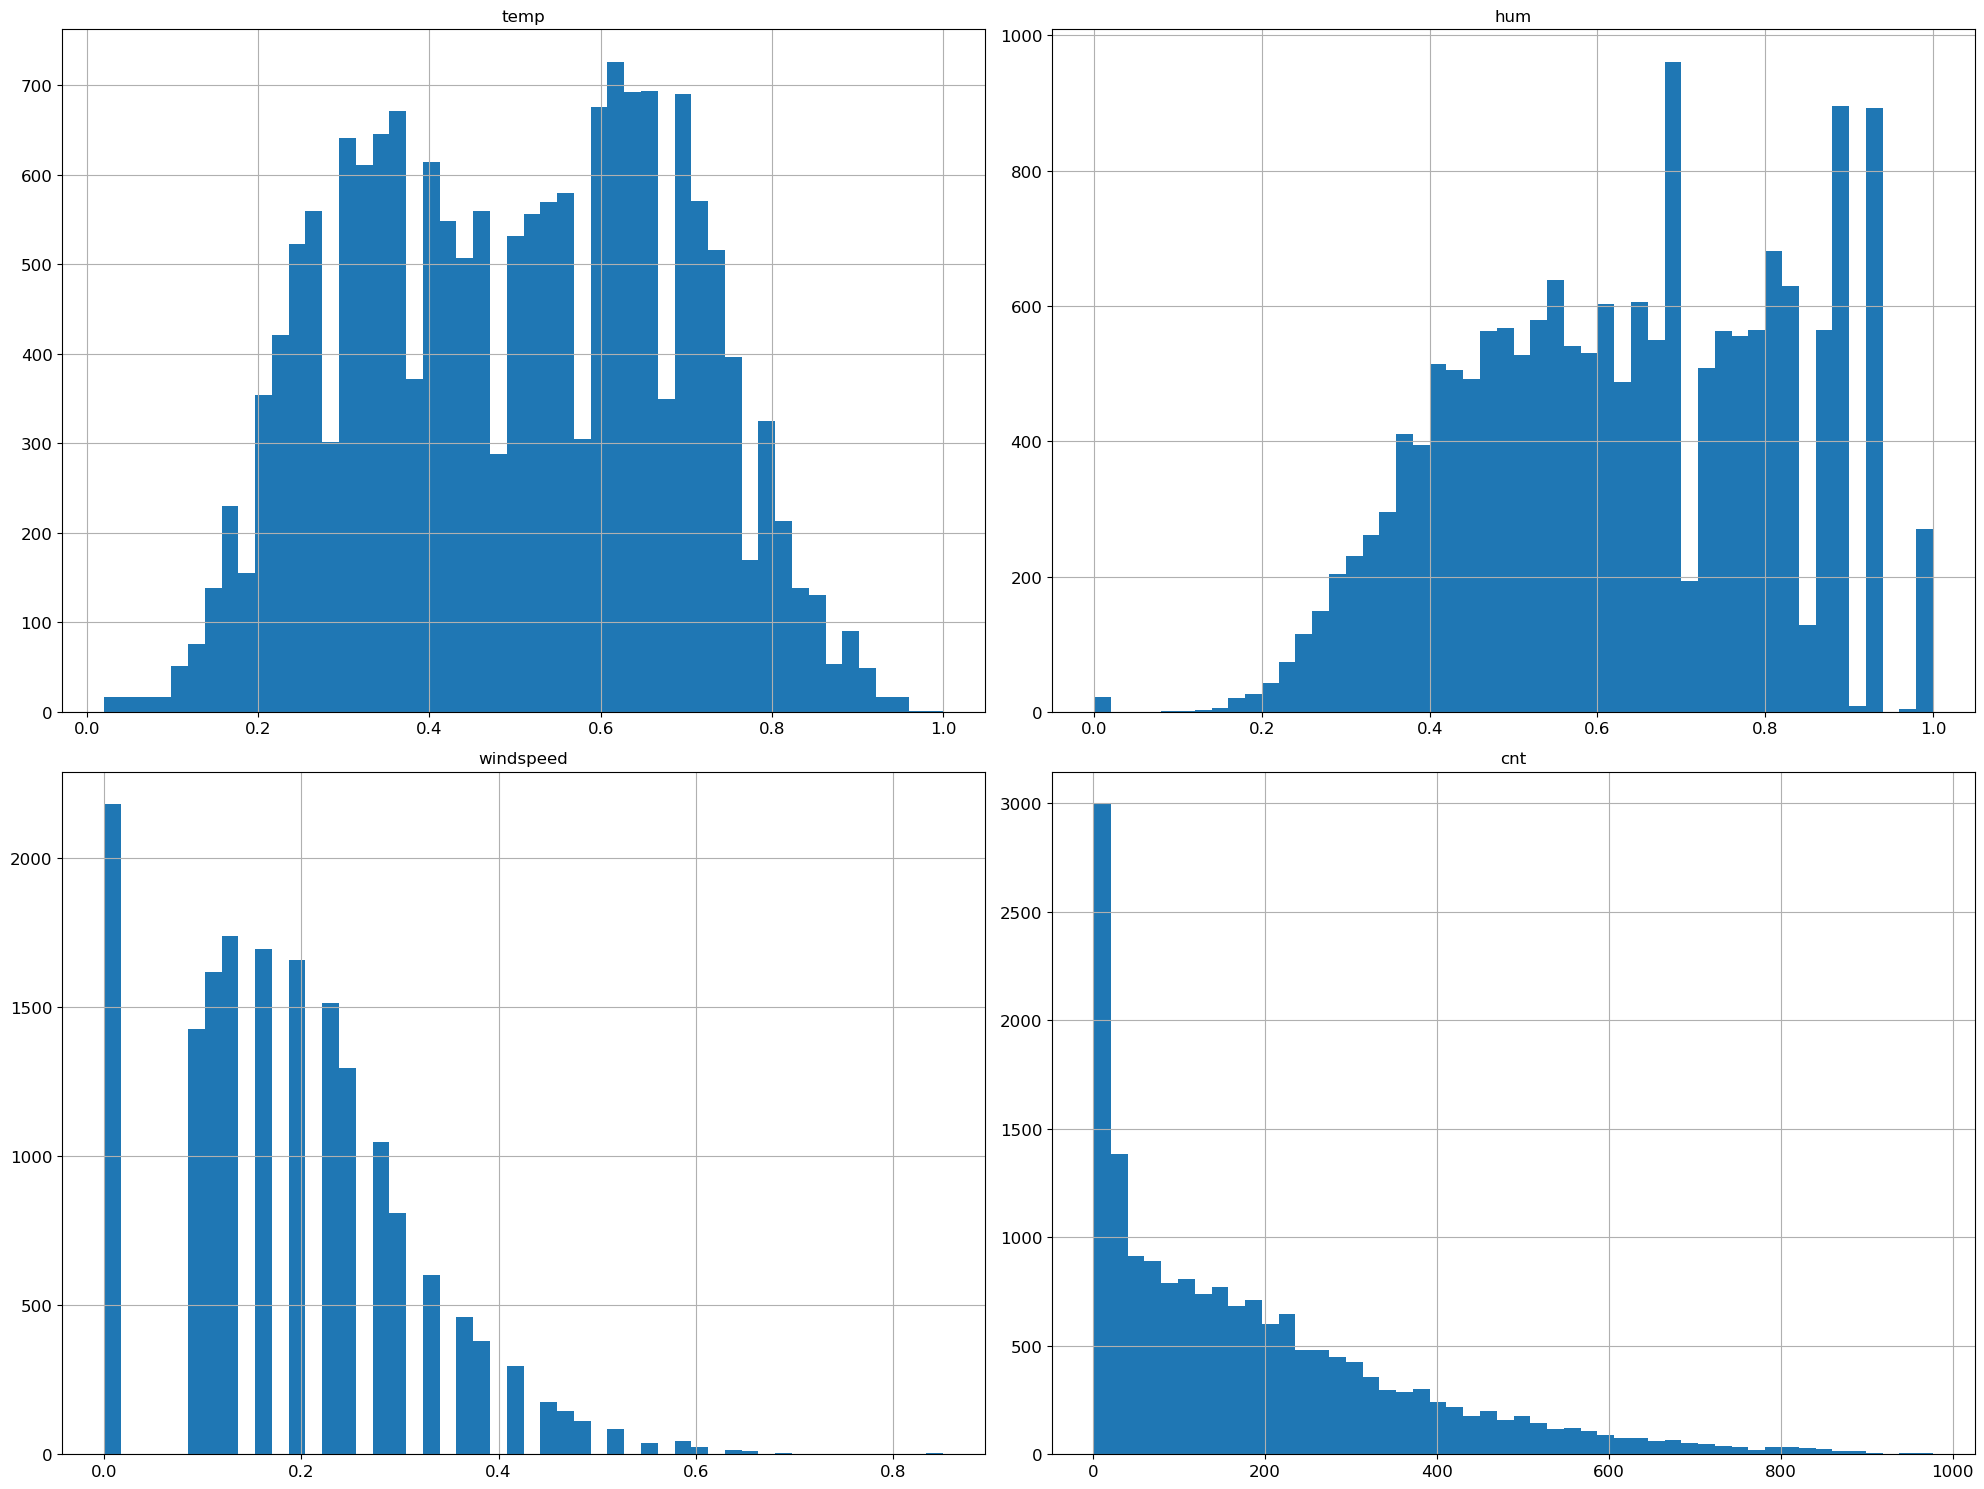

In [31]:
data_1.hist(bins=50, figsize=(20, 15))
save_fig('attribute_histogram_plots')
plt.show()

These four histograms representing the distribution of values for four different variables: `temp`, `hum` (humidity), `windspeed`, and `cnt` (count). The `bins=50` parameter creates 50 bins for each histogram, providing a detailed view of the data distribution.

1. **Temperature (temp)**: The distribution of temperature values appears to be roughly bell-shaped, which suggests a normal or Gaussian distribution. The data is centered around a peak, indicating that most temperature readings are around the median value. There's a range from about 0.2 to 0.8 on the normalized scale, suggesting that extreme temperatures are less common.

2. **Humidity (hum)**: The humidity histogram shows an interesting pattern with several peaks, which might suggest multiple modes. It’s not a typical Gaussian distribution and indicates that certain humidity levels are more common than others. There's a noticeable increase in frequency as humidity approaches 1.0, which might indicate that high humidity levels are frequently recorded.

3. **Windspeed**: This histogram is right-skewed, indicating that lower windspeeds occur more frequently than higher ones. There is a sharp peak at the lower end of the windspeed scale, which then drops off quickly. This suggests that very high windspeeds are rare in this dataset.

4. **Count (cnt)**: The distribution of count values is highly skewed to the right, with the majority of values being low. There is a steep drop-off as the count value increases, indicating that high count values are very uncommon. The long tail to the right suggests the presence of outliers or extreme values that are much higher than the rest.

These histograms are useful to understand the underlying distribution of each variable, which is important for data preprocessing and selection of appropriate statistical or machine learning models. For instance, variables with normal distributions may not require transformation, whereas skewed variables might benefit from methods such as log transformation to normalize their distribution.

Saving figure good_visualization_plot


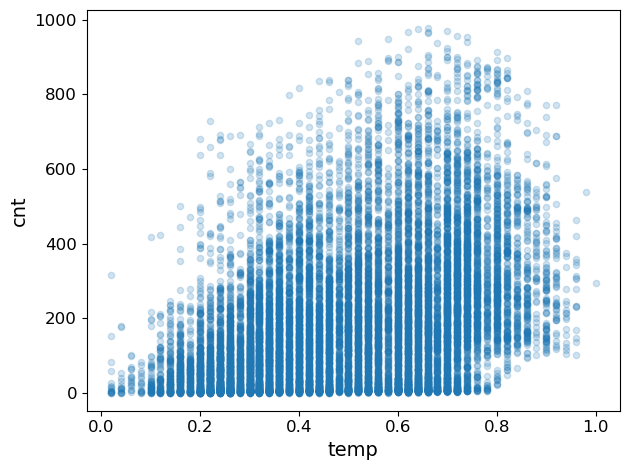

In [32]:
data_1.plot(kind="scatter", x="temp", y="cnt", alpha=0.2)
save_fig("good_visualization_plot")

This scatter plot depicts the relationship between temperature (`temp`) on the x-axis and count (`cnt`) on the y-axis.

- Each point represents an individual observation of the count in relation to the temperature.
- The `temp` variable appears to be normalized, as its values range from 0.0 to 1.0, possibly representing the proportion of maximum temperature.
- The `cnt` variable ranges from 0 to around 1000, which could represent a count of occurrences, events, or objects like sales, people, etc.
- The `alpha=0.2` parameter in the plot function call makes the points semi-transparent. This transparency helps in visualizing the density of the points where they overlap; darker areas indicate a higher concentration of data points.
- The scatter plot shows a wide dispersion of points, suggesting that as temperature increases, the count also increases to a certain point but not in a strictly linear manner. There appears to be a larger concentration of higher counts at moderate temperatures, while extremely low or high temperatures have fewer high count values.
- The absence of a clear, distinct line or pattern indicates that the relationship between temperature and count is not perfectly linear and likely influenced by other factors not displayed in this two-dimensional plot.

Overall, this scatter plot is useful for identifying trends and patterns between the two variables, helping to inform further analysis, such as identifying optimal temperature ranges for maximum counts or understanding the effect of temperature on activity levels.

# Now, let's look for correlations. 

1. **Definition of Correlation**: Correlation measures the strength and direction of a linear relationship between two variables. It's a statistical tool used to determine if one variable is predictably related to another.

2. **Correlation Coefficient**: The most common measure of correlation is the Pearson correlation coefficient, typically denoted as 'r'. This coefficient ranges from -1 to +1. A value of +1 implies a perfect positive correlation, -1 implies a perfect negative correlation, and 0 indicates no linear correlation.

3. **Positive vs. Negative Correlation**:
    - **Positive Correlation**: As one variable increases, the other variable tends to also increase. An example might be height and weight; generally, taller people weigh more.
    - **Negative Correlation**: As one variable increases, the other decreases. An example could be the relationship between the number of hours spent watching TV and grades in school; more TV watching might correlate with lower grades.

4. **Correlation vs. Causation**: It's crucial to remember that correlation does not imply causation. Just because two variables are correlated, it doesn't mean that one causes the other to change. There could be other underlying factors or a coincidental relationship.

5. **Spurious Correlations**: Sometimes correlations can be misleading. Two variables might appear to be related due to coincidence or because they are both influenced by a third, unaccounted-for variable.

6. **Usage in Data Analysis**: Correlation analysis is widely used in various fields like finance, medicine, and social sciences to identify relationships between variables. This can help in predictive modeling, trend analysis, and hypothesis testing.

7. **Graphical Representation**: Scatter plots are often used to visually assess the relationship between two continuous variables. The pattern of the scatter plot can provide insights into the nature and strength of the correlation.

8. **Limitations**: Correlation only assesses linear relationships. Non-linear relationships may not be adequately represented by correlation coefficients. Also, it is sensitive to outliers, which can significantly distort the perceived relationship.

9. **Statistical Significance**: A correlation coefficient by itself does not indicate whether the relationship between the variables is statistically significant. Additional testing, such as a hypothesis test for correlation, is required to determine this.

10. **Multiple Correlations**: In complex data sets, it's important to look at the correlation matrix to understand the relationships between multiple pairs of variables, not just in isolation.

Understanding correlation is fundamental in statistics as it helps in making informed decisions based on the relationships between variables.

In [33]:
corr_matrix = data_1.corr()
corr_matrix['cnt'].sort_values(ascending=False)

cnt           1.000000
temp          0.404772
hr            0.394071
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

These correlations provide insights into factors that influence bike rental behavior. Temperature, time of day, and year seem to have the most substantial positive impact on bike rentals, while humidity and adverse weather conditions negatively affect them. Such information is crucial for predictive modeling and understanding user behavior in the context of bike-sharing services.

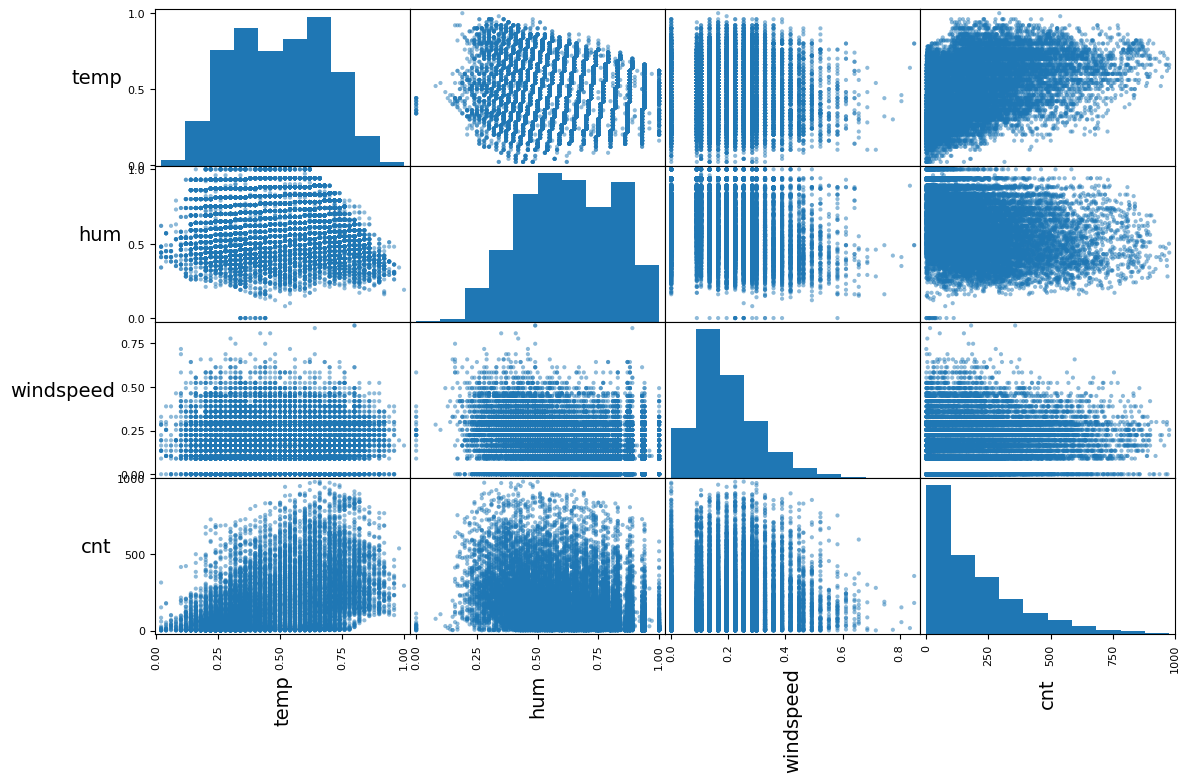

In [34]:
from pandas.plotting import scatter_matrix

axes = scatter_matrix(data_1,figsize=(12, 8))

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

This scatter matrix (also known as a pair plot) displays scatter plots for each pair of variables in the dataset and histograms to show the distribution of each individual variable.

1. **Diagonal (Histograms)**: 
   - The histogram for `temp` appears somewhat normally distributed.
   - The histogram for `hum` shows a slight left skew but is relatively uniform across a range of values.
   - `windspeed` has a right-skewed distribution with a concentration of values at the lower end, indicating lower windspeeds are more common.
   - The `cnt` histogram is also right-skewed, indicating that lower counts are more common, and higher counts are rarer.

2. **Scatter Plots**: 
   - `temp` vs. `hum`: The plot does not show a clear relationship; the points are widely spread, suggesting a weak or no linear correlation.
   - `temp` vs. `windspeed`: There is no clear pattern, indicating a lack of strong linear correlation.
   - `temp` vs. `cnt`: There appears to be a positive relationship; as `temp` increases, `cnt` also increases, although the relationship is not perfectly linear.
   - `hum` vs. `windspeed`: The plot is dense with no discernible pattern, suggesting a weak or no linear correlation.
   - `hum` vs. `cnt`: There is no clear pattern, indicating that humidity does not have a simple linear relationship with count.
   - `windspeed` vs. `cnt`: There is no obvious pattern, implying that windspeed alone does not strongly predict count.
   - The scatter plots between `hum`, `windspeed`, and `temp` against `cnt` show that as the values of these variables increase, the spread in `cnt` also increases, suggesting some level of interaction or a multiplicative effect.

3. **Adjustments to the Plot**:
   - Labels on the x-axis are rotated 90 degrees to prevent overlap and improve readability.
   - Labels on the y-axis are set to 0 degrees and aligned to the right for better visibility.
   - `plt.tight_layout()` adjusts the subplot params so that the subplots fit into the figure area.
   - `plt.gcf().subplots_adjust(wspace=0, hspace=0)` removes any whitespace between the subplots.

Overall, this scatter matrix is useful for quickly spotting any correlations between variables. It also highlights the distribution of each variable, which can inform data preprocessing decisions, such as whether transformations are needed to handle skewness or outliers. The lack of clear linear patterns suggests that more complex models or transformations might be necessary to capture the relationships between variables.

## Understanding the data

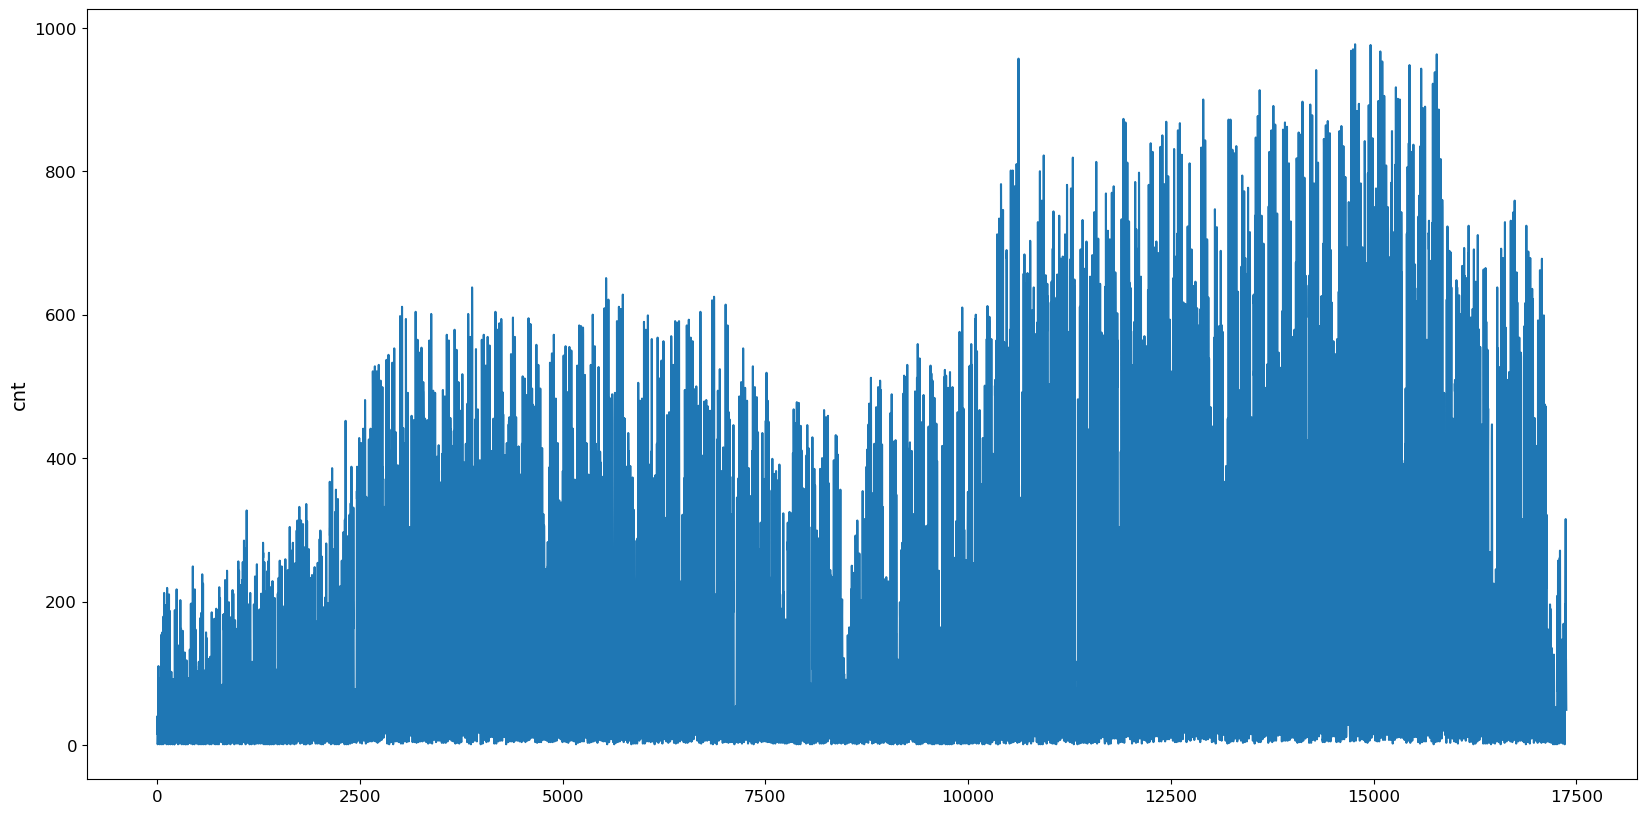

In [35]:
# visualise the pattern of demand (target variable - 'cnt') over period of two years
plt.figure(figsize=(20,10))
sns.lineplot(data_1.cnt)
plt.show()

This line plot represent a pattern of the demand for a particular variable or count ('cnt') over a period of two years.

- The x-axis likely represents time, though it's not explicitly labeled. Given the title, it could be indexed to hours, days, or months over two years.
- The y-axis represents the count ('cnt'), which could indicate the quantity of items sold, the number of users, transactions, or any other metric that can be counted.
- The plot shows the fluctuations in the count over time with peaks and troughs.
- The peaks represent the times with the highest demand, while the troughs indicate the lowest demand.
- The overall pattern might suggest seasonality, recurring trends, or cycles in the data, which could be daily, weekly, monthly, or even yearly.
- Without more context or axis labels, it's difficult to deduce the exact nature of the time series, but the general up and down movement indicates variability in the 'cnt' over the observed period.
- The highest peaks could represent special events or peak business times, while the lowest points could occur during off-hours or off-seasons.

This visual is useful for identifying long-term trends, seasonal effects, and periods of high or low demand. It can be a valuable tool for forecasting and planning purposes.

<Axes: >

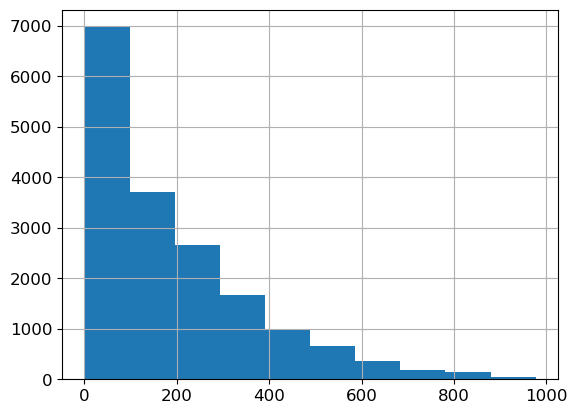

In [36]:
data_1['cnt'].hist()

The histogram is a graphical representation showing the distribution of a numerical dataset. 

- The x-axis represents bins or intervals for the 'cnt' variable. Each bin aggregates the 'cnt' values into ranges (e.g., 0-200, 200-400, etc.).
- The y-axis shows the frequency of 'cnt' values within each bin, which tells us how many occurrences fall into each bin's range.
- The histogram shows that the majority of 'cnt' values are concentrated in the lower range, near the left side of the histogram. This suggests that lower counts occur more frequently than higher counts.
- As the count value increases (moving right along the x-axis), the frequency of those values significantly decreases. This is indicative of a right-skewed distribution, where there are fewer instances of higher counts.
- The bars decrease in height from left to right, which means there are fewer occurrences of higher 'cnt' values and more occurrences of lower 'cnt' values.
- The tallest bar is the first one, indicating that the most frequent 'cnt' values are between 0 and the upper limit of the first bin.
- There are very few occurrences towards the far right of the histogram (higher 'cnt' values), which could represent rare events or outliers.

This histogram is useful for understanding the distribution of 'cnt', identifying common and rare values, and determining the skewness of the data. In this case, the distribution is not uniform and shows that lower 'cnt' values are much more common than higher ones.

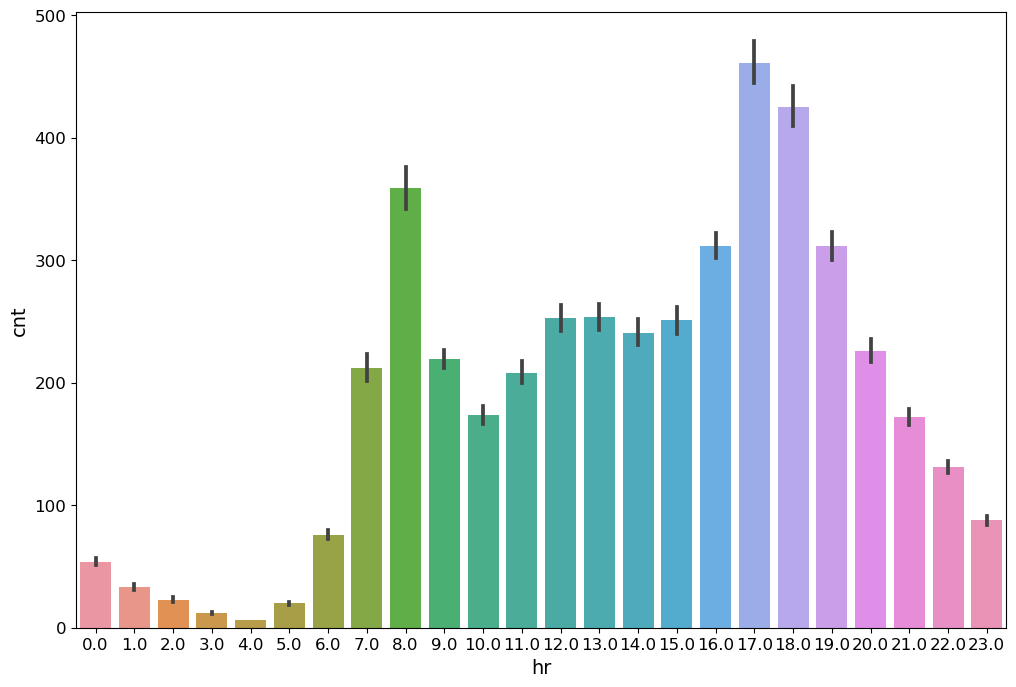

In [37]:
plt.figure(figsize=(12, 8))
sns.barplot(data=data_1, x='hr', y='cnt')
plt.show()

This bar chart created using Seaborn, depict the count ('cnt') on the y-axis against the hour of the day ('hr') on the x-axis.

- **Low Activity in Early Hours**: There's a very low count in the earliest hours of the day (0-5), which suggests minimal activity or events occurring during these times.

- **Morning Increase**: A sharp increase in count is observed at hour 7, which could correspond to morning rush hours or the beginning of a daily cycle of activity.

- **Daytime Activity**: From hours 10 to 16, there's a fairly consistent level of count, which could indicate a stable period of activity during the day.

- **Evening Peak**: The highest counts are seen in the hours 17 to 19, which might represent evening rush hour or peak activity periods in the day.

- **Night Decline**: There's a decline in count after hour 19, continuing to drop through the late evening until it reaches the lowest levels at the final hours (22-23).

The error bars on top of each bar represent the variability of the count within each hour, giving an indication of how consistent the counts are from day to day at that hour. The presence of error bars suggests that there is some variability, but without knowing the specific calculation behind them (standard deviation, confidence intervals, etc.), it's difficult to draw precise conclusions.

Overall, this bar chart is useful for identifying trends in activity levels across different hours of the day. It can inform decisions on resource allocation, staffing, or services provided at different times.

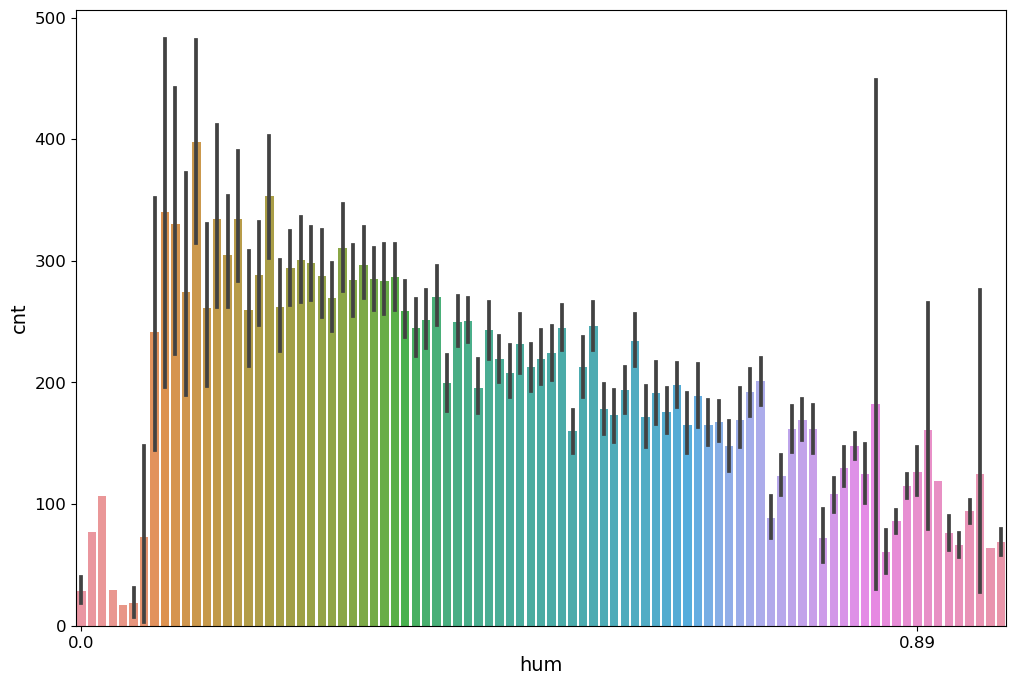

In [38]:
plt.figure(figsize=(12, 8))
sns.barplot(data=data_1, x='hum', y='cnt')
plt.xticks([0, 80])
plt.show()

This bar chart represent humidity ('hum') on the x-axis and the count ('cnt') on the y-axis.

- **X-Axis (Humidity)**: The 'hum' variable appears to be either continuous or divided into a large number of categories, which are represented along the x-axis. The range of humidity levels is not labeled, but it's common for humidity to be represented as a percentage from 0 to 100.

- **Y-Axis (Count)**: The 'cnt' variable on the y-axis represents a count of some kind, such as number of events, items, or occurrences. The count values range from 0 to just over 500.

- **Bars**: Each bar represents the average 'cnt' for a given 'hum' value or range. The bars are colored in a gradient, possibly indicating a transition of some kind—though without further context, it's unclear what that transition might be.

- **Error Bars**: The black lines on top of the bars represent the variability within each 'hum' category, which could be standard deviation, standard error, or confidence intervals. Large error bars indicate greater variability of 'cnt' at that humidity level.

- **Trend**: There appears to be a somewhat cyclical pattern in the 'cnt' values as 'hum' changes, with some humidity levels associated with higher counts and others with lower counts.

- **Observations**:
  - Lower humidity levels have a wide range of counts, with some very low and some higher peaks, suggesting variability in how humidity affects count.
  - There is a noticeable increase in the average count in the middle ranges of humidity, though with significant variability as indicated by the error bars.
  - At the very high humidity levels, the count tends to decrease, although not as consistently as it increased in the middle ranges.

This type of visualization could be used to analyze the relationship between environmental conditions (like humidity) and activity levels, product demand, or any other countable occurrence.

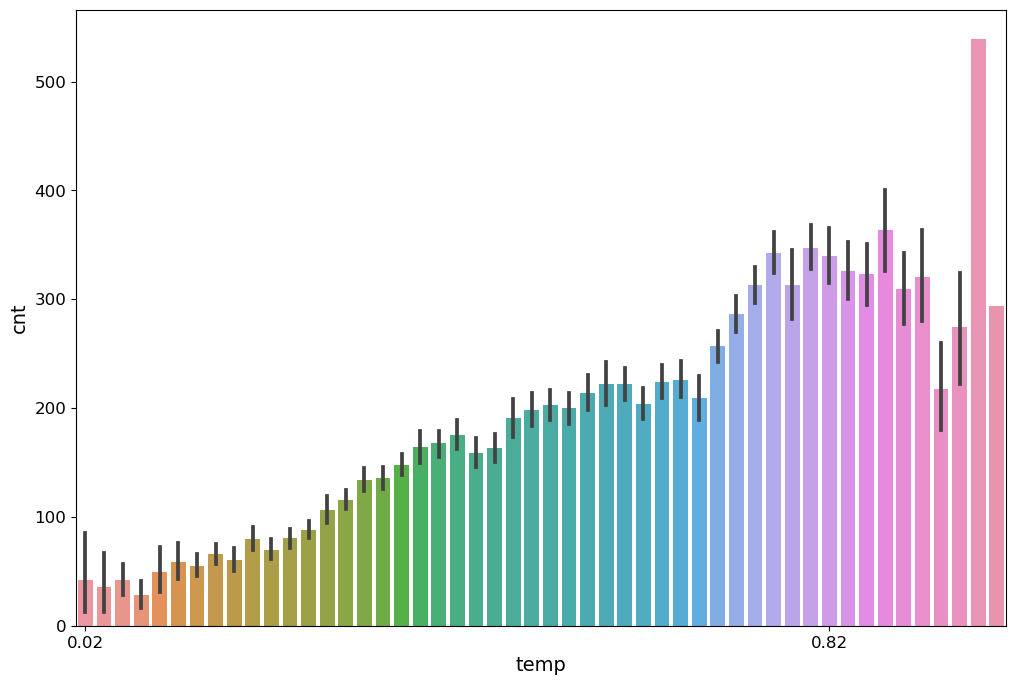

In [39]:
plt.figure(figsize=(12, 8))
sns.barplot(data=data_1, x='temp', y='cnt')
plt.xticks([0, 40])
plt.show()

This bar chart is a representation of 'cnt' against 'temp'. The 'temp' variable appears to be normalized between 0 and 1, and the 'cnt' variable represents the number of occurrences or events. 

- **Temperature Distribution**: The temperature values start from near 0 and go up to 1, likely indicating a percentage of maximum temperature or a normalized scale.

- **Count Trend**: The count generally increases as the temperature rises, peaking around the middle temperature values before tailing off slightly. However, there's a significant spike at the end, which could suggest an outlier or a specific condition causing a high count at that temperature.

- **Error Bars**: The black lines on top of the bars represent the variability or uncertainty within the counts for each temperature bin, suggesting variation in the data points that fall within each temperature range.

Overall, this chart is used to analyze the relationship between temperature and the frequency of an event, such as sales, attendance, or usage patterns, and can inform decisions related to planning for temperature-related variations in activity.

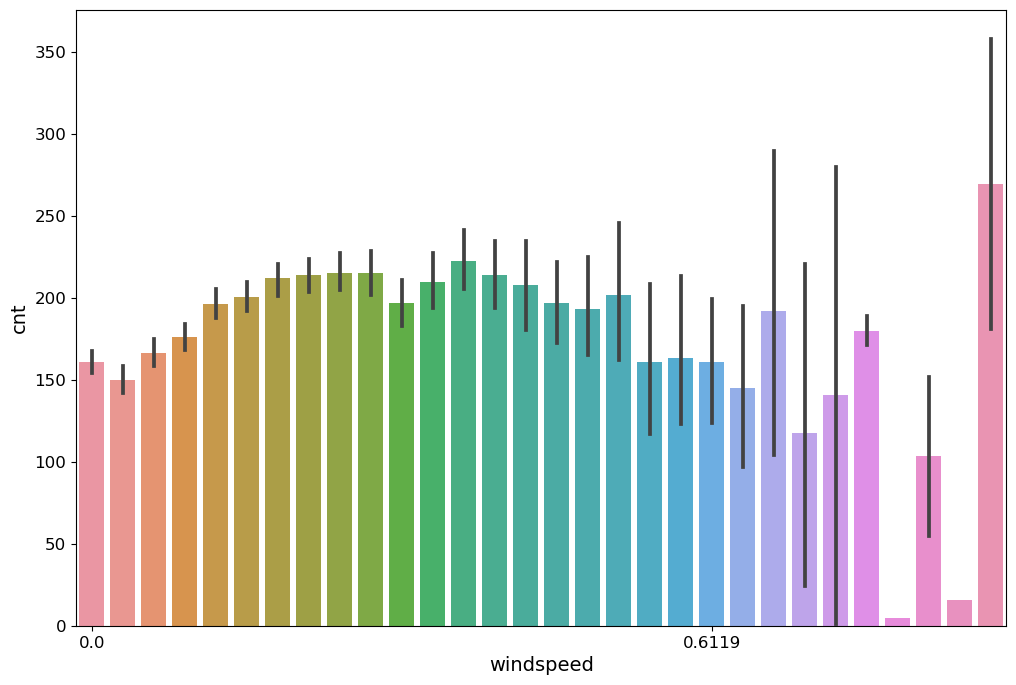

In [40]:
plt.figure(figsize=(12, 8))
sns.barplot(data=data_1, x='windspeed', y='cnt')
plt.xticks([0, 20])
plt.show()

This bar chart shows the relationship between wind speed ('windspeed') on the x-axis and count ('cnt') on the y-axis. 

- **X-Axis (Wind Speed)**: The wind speed is shown as a continuous variable, with many distinct values or bins along the x-axis. The values appear to be normalized or scaled, possibly representing the proportion of a maximum wind speed value.

- **Y-Axis (Count)**: The count on the y-axis seems to represent the number of occurrences or measurements recorded. The values range from close to 0 up to around 350.

- **Bar Heights**: Each bar's height represents the count associated with a specific wind speed. The distribution of counts seems relatively uniform for the mid-range of wind speeds, with a gradual decrease in count as wind speed increases.

- **Error Bars**: The black lines on top of the bars represent the variability or spread of the count data within each wind speed category, indicating the presence of variation or outliers.

- **Overall Trend**: There's an observable decrease in count at higher wind speeds, suggesting that fewer events or occurrences are recorded as wind speed increases, which might be due to less favorable conditions.


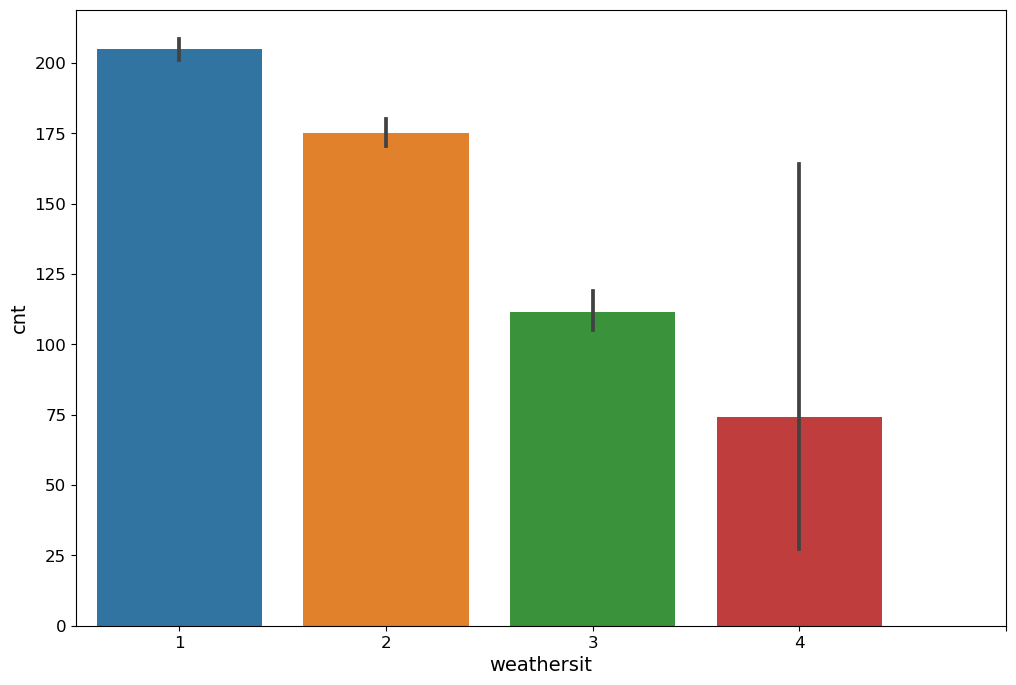

In [41]:
plt.figure(figsize=(12, 8))
sns.barplot(data=data_1, x='weathersit', y='cnt')
plt.xticks([0, 1, 2, 3, 4])
plt.show()

This bar chart representing the count ('cnt') for different weather situations ('weathersit'). 

- **X-Axis (Weather Situation)**: The 'weathersit' variable is categorical with four unique values, likely corresponding to different weather conditions. These categories could be, for example, 1 for clear weather, 2 for cloudy, 3 for light rain/snow, and 4 for heavy rain or storms, based on a common way of categorizing weather conditions.

- **Y-Axis (Count)**: The 'cnt' variable indicates the number of occurrences, which could be anything from the number of people at an event to the number of transactions or rentals.

- **Bars**: Each bar represents the average count for each weather situation. The height of the bar reflects the magnitude of 'cnt'.

- **Bar Colors**: Each weather situation category has been assigned a different color to distinguish between them visually.

- **Error Bars**: The black lines on top of the bars represent the variability or uncertainty within the counts for each weather situation. This could indicate the variation in counts from day to day under the same weather conditions.

- **Interpretation**: The bar for weather situation 1 has the highest average count, suggesting that clear weather is associated with the highest number of occurrences. The count decreases with the worsening of weather conditions, with weather situation 4 showing the lowest count. However, the error bar for category 4 is large, suggesting there is a high variability in the counts for this weather condition, which could indicate less frequent but highly variable occurrences.

This type of visualization helps in understanding the impact of weather on the count variable, which can be crucial for businesses and services that are affected by weather conditions, such as outdoor events, transportation services, or retail businesses.

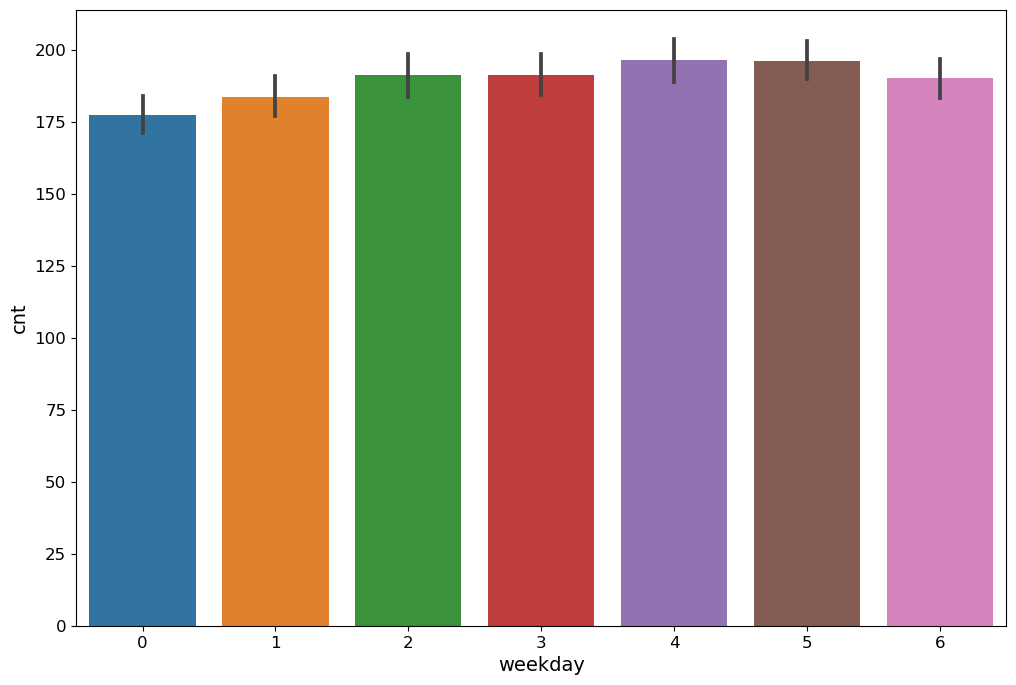

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(data=data_1, x='weekday', y='cnt')
plt.xticks([0, 1, 2, 3, 4, 5, 6])
plt.show()

The visual depicts a bar chart that represents the count ('cnt') for each day of the week ('weekday'). In this context, 'weekday' is likely encoded as integers 0 through 6, corresponding to days of the week from Sunday to Saturday, respectively.

- **X-Axis (Weekday)**: The x-axis categorizes the data by days of the week, starting with 0 (commonly Sunday) through to 6 (commonly Saturday).

- **Y-Axis (Count)**: The y-axis shows the count of a certain variable, which could be the number of occurrences, transactions, visitors, etc., associated with each day of the week. The counts range from just under 150 to just over 200.

- **Bars**: Each bar corresponds to the average count for a given day of the week. The heights of the bars are relatively consistent across the days, with a slight variation.

- **Error Bars**: The black lines on top of each bar indicate the variability or standard deviation of the count for each day. The consistency of these error bars suggests that the variation in count is relatively similar for each day.

- **Color Coding**: Each bar is colored differently, which serves purely a visual or aesthetic purpose in this case, as there doesn't seem to be a legend indicating any further categorization.

- **Uniformity**: There's no significant difference in the count between the days of the week, which would suggest that the event or behavior being counted is relatively stable throughout the week.

This type of chart is useful for identifying trends or patterns on different days of the week, which can be helpful for scheduling, staffing, and resource management for businesses or services. However, in this case, the data suggests there is no significant variation in the counts from day to day.

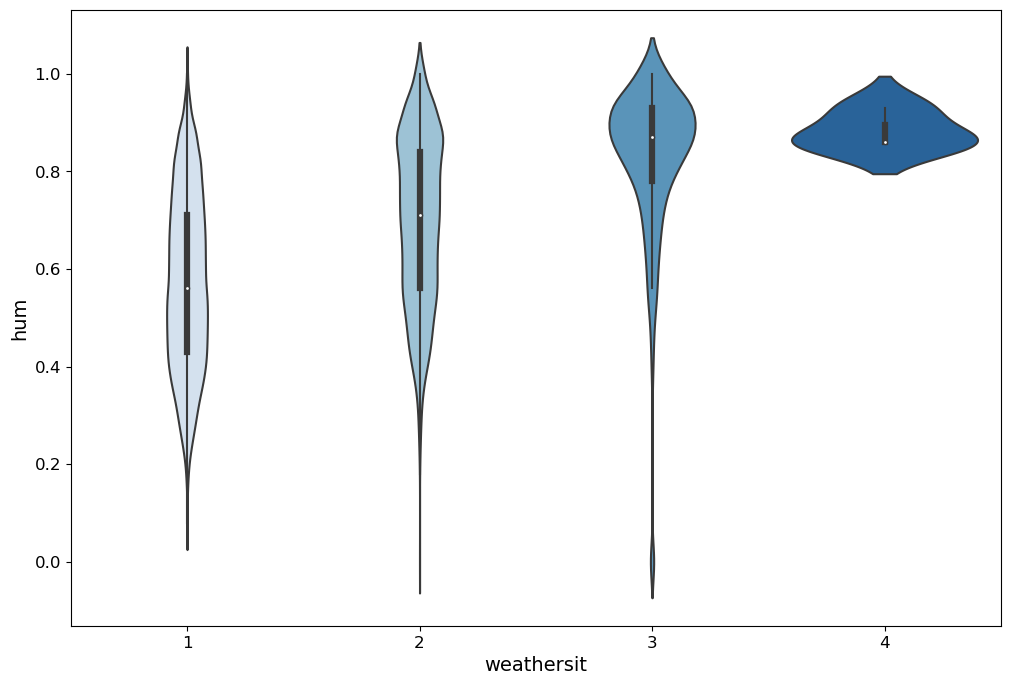

In [43]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=data_1, x='weathersit', y='hum', palette='Blues')
plt.show()

This violin plot illustrates the distribution of humidity ('hum') across different weather situations ('weathersit'). Each "violin" represents the distribution of humidity for a specific category of weather.

- **X-Axis (Weather Situation)**: The 'weathersit' categories are discrete and are likely coded as 1, 2, 3, and 4. These could correspond to different weather conditions, such as clear, cloudy, light precipitation, and heavy precipitation, respectively.

- **Y-Axis (Humidity)**: The humidity values are shown on a scale from 0 to 1, which suggests that the data might be normalized or represent a relative humidity percentage.

- **Shape of the Violins**: 
   - The width of each violin at different y-values represents the density of data points at that humidity level within the weather category.
   - Categories 1 and 2 show a wide distribution, indicating a range of humidity levels, with the median value around 0.6 to 0.7.
   - Category 3 has a narrower distribution, suggesting more consistent humidity levels when this weather situation occurs.
   - Category 4 shows a very narrow and flat distribution at the top, indicating low variability in high humidity levels, which is common during heavy precipitation events.

- **Median Marks**: Inside each violin, the white dot represents the median humidity level for that category. Categories 1 through 3 show the median near the middle of the humidity range, while category 4's median is toward the higher end, which is consistent with expectations for more severe weather conditions.

- **Palette**: The 'Blues' palette gives the plot a gradient of blue shades, possibly indicating the intensity or type of weather situation, although this is not explicitly stated.

This violin plot provides a comprehensive view of how humidity is distributed within different weather conditions. It reveals not just the median values but also the density and spread of humidity readings, which can be valuable for understanding environmental patterns and planning activities sensitive to humidity and weather conditions.

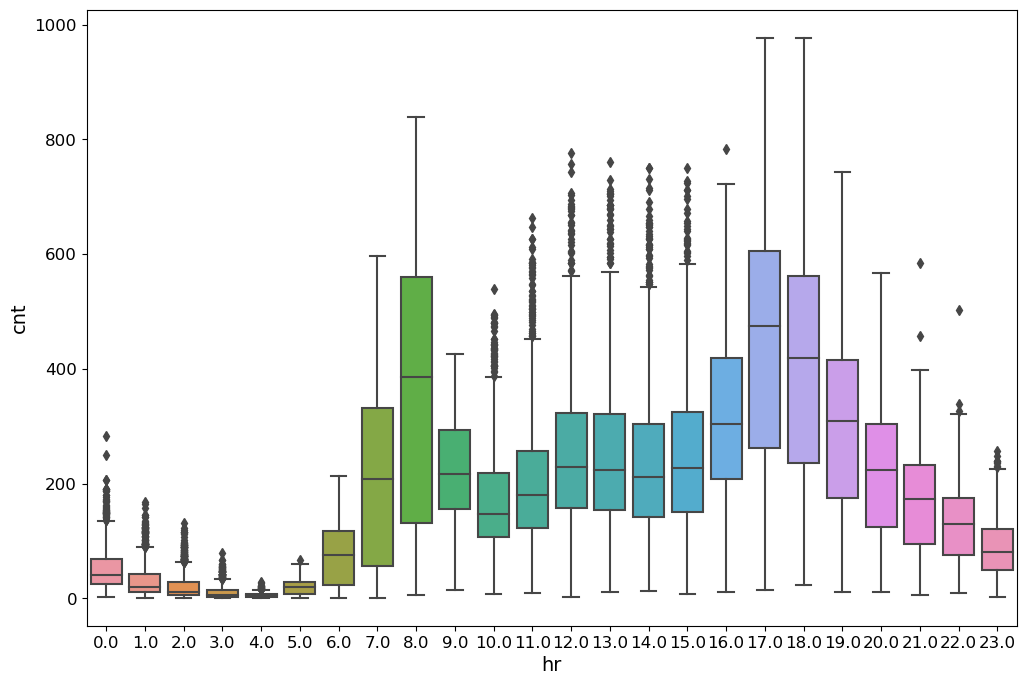

In [44]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_1, y='cnt', x='hr')
plt.show()

The boxplot is a standardized way of displaying the distribution of the data based on a five-number summary: minimum, first quartile (Q1), median, third quartile (Q3), and maximum.

- The x-axis represents hours of the day (0 to 23), likely in 24-hour format.
- The y-axis represents the count ('cnt'), which could be a count of events, objects, or occurrences recorded at different times of the day.
- Each box represents the interquartile range (IQR) for the count during each hour:
  - The bottom of the box shows the first quartile (Q1), which is the 25th percentile of the data.
  - The line in the middle of the box is the median, which represents the 50th percentile.
  - The top of the box indicates the third quartile (Q3), the 75th percentile.
- The "whiskers" extend from the box to the highest and lowest values, excluding outliers.
- Points outside of the whiskers are considered outliers, which are values that lie beyond the expected range. They are marked with diamonds in this visual.

From this boxplot, we can deduce the following:

- There is a pattern where the median count seems to be lower in the early hours (0-5), higher during midday to early evening (10-18), and then decreases again during the late hours (19-23).
- The length of the boxes varies, indicating differing levels of variability in counts throughout the day. For example, hours in the middle of the day (around 10 to 15) have boxes that are taller, which suggests more variability in counts during these hours.
- The presence of outliers suggests there are hours with counts that are unusually high or low compared to the typical range for that hour.
- The median line shifts throughout the day, which can indicate the central tendency of the count at different hours. For instance, during hours 17 and 18, the median is higher, suggesting a greater number of counts typically occurs during these hours.

This type of visual is helpful in understanding how the counts change over the course of a day and to identify any patterns or anomalies in the time series data.

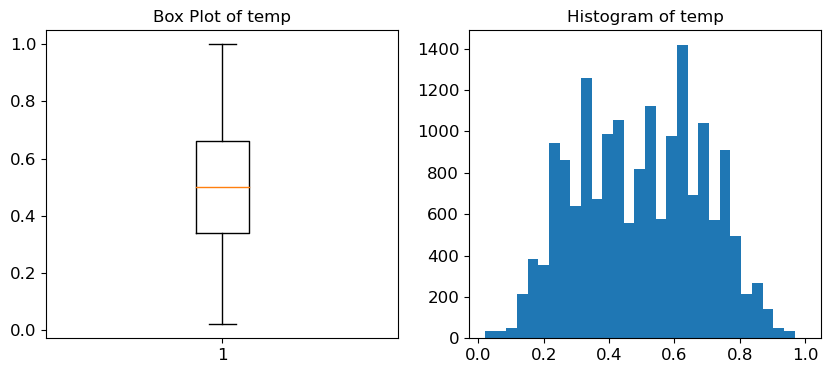

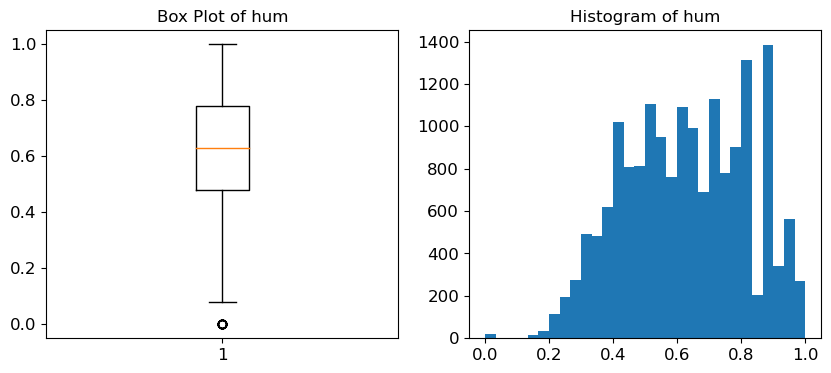

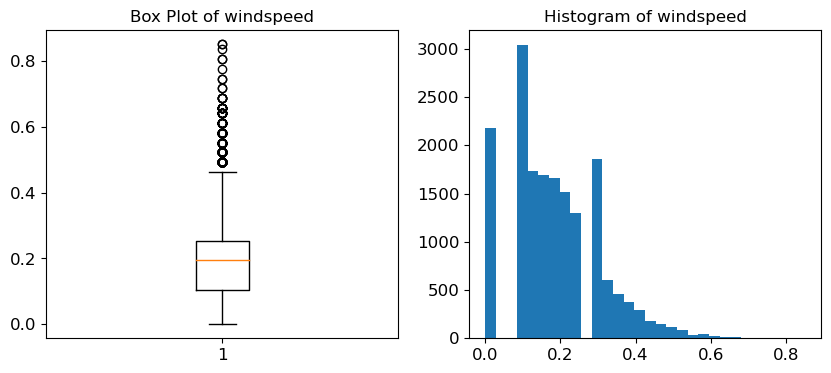

In [45]:
# Replace 'feature_name' with the actual feature names you want to check
for feature_name in ['temp', 'hum', 'windspeed']:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.boxplot(data_1[feature_name])
    plt.title(f'Box Plot of {feature_name}')

    plt.subplot(1, 2, 2)
    plt.hist(data_1[feature_name], bins=30)
    plt.title(f'Histogram of {feature_name}')
    plt.show()


These plots represent the distribution of temperature, humidity, and wind speed, each normalized between 0 and 1.

- **Temperature:** The box plot indicates a median around 0.5, with most data points falling between 0.3 and 0.7. The histogram suggests a bimodal distribution with two peaks around 0.3 and 0.6, indicating two prevalent temperature ranges.

- **Humidity:** The box plot shows a median value just above 0.6, with an interquartile range from 0.4 to 0.8 and an outlier at a lower value. The histogram reveals a right-skewed distribution with a concentration of values towards higher humidity levels, peaking just below 1.0.

- **Wind Speed:** The box plot reveals a median wind speed around 0.2, with most data between 0.1 and 0.3, and several outliers above the upper whisker. The histogram shows a left-skewed distribution with a high frequency of lower wind speed values, notably around 0.1 to 0.2, and fewer instances as the wind speed increases.

Here, temperature has two common ranges, humidity is generally high, and wind speed is predominantly low in the dataset.

In [46]:
from scipy import stats
import pandas as pd

z_scores = np.abs(stats.zscore(data_1['windspeed']))
threshold = 3  # Typically a Z-score of 3 or -3 is considered an outlier
data_1_filtered = data_1[(z_scores < threshold)]

# Compare the shapes of the original and filtered datasets
print(f"Original DataFrame shape: {data_1.shape}")
print(f"Filtered DataFrame shape: {data_1_filtered.shape}")


Original DataFrame shape: (17379, 12)
Filtered DataFrame shape: (17272, 12)


This is to apply the Z-score to filter our dataset `data_1` to remove outliers in the 'windspeed' column. The Z-score is a measure of how many standard deviations an element is from the mean. A threshold of 3 is used here, meaning that any data point with a Z-score greater than 3 or less than -3 is considered an outlier and is filtered out.

After applying this filter to the 'windspeed' column, the dataset is reduced from 17,379 to 17,272 entries, indicating that 107 entries were considered outliers based on the windspeed variable and thus removed from `data_1`. 

The shape of the DataFrame before and after the filtering indicates the number of rows and columns. Both DataFrames have the same number of columns (12), but the filtered DataFrame has fewer rows due to the removal of outliers.

In [47]:
cap_value = data_1['hum'].quantile(0.95)  # Cap at the 95th percentile
data_1['hum_capped'] = np.where(data_1['hum'] > cap_value, cap_value, data_1['hum'])
data_1['hum_capped']

0        0.81
1        0.80
2        0.80
3        0.75
4        0.75
         ... 
17374    0.60
17375    0.60
17376    0.60
17377    0.56
17378    0.65
Name: hum_capped, Length: 17379, dtype: float64

This is to performs a capping operation on the 'hum' column of our DataFrame, which contains humidity data. It calculates the 95th percentile value of the 'hum' column, and then it creates a new column named 'hum_capped'. In this new column, any value in the 'hum' column that exceeds the 95th percentile value is replaced with the 95th percentile value itself. All other values remain unchanged.

This technique is often used in data preprocessing to limit the effect of outliers that are not extreme enough to be completely discarded but are still significantly higher than the majority of the data. By capping the data at the 95th percentile, the most extreme 5% of the humidity values are effectively trimmed to reduce their impact on subsequent analysis.

The last part of the snippet shows the first five and the last four capped humidity values in the 'hum_capped' column, demonstrating the application of the cap. There are a total of 17,379 entries in the 'hum_capped' column, indicating that no rows were removed from the DataFrame; only some values were altered due to the capping process.

In [48]:
data_1['cnt'] = np.log(data_1['cnt'] + 1)
data_1['cnt']

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
17374    4.787492
17375    4.499810
17376    4.510860
17377    4.127134
17378    3.912023
Name: cnt, Length: 17379, dtype: float64

This is to apply a logarithmic transformation to the 'cnt' column of our DataFrame. The transformation uses the natural logarithm function `np.log`, and 1 is added to the 'cnt' values before taking the logarithm to ensure that the transformation is defined for zero counts (since the logarithm of zero is undefined).

Logarithmic transformation is a common data preprocessing step used to handle skewed data and is particularly useful when dealing with variables that contain a few extremely high values (outliers) which can disproportionately affect the mean. By applying a log transformation, the data becomes more normally distributed, which is often a desirable property for statistical modeling, as many models assume normally distributed residuals.

After the transformation, each value in the 'cnt' column is replaced with its logarithmic value. The snippet ends with the display of transformed 'cnt' values for the first five and the last four entries in the DataFrame, showing that the transformation has been applied to the entire column, with the DataFrame still containing 17,379 entries.

In [51]:
from scipy import stats

# Assuming 'data_1' is your DataFrame and 'windspeed' is the column
z_scores = stats.zscore(data_1['cnt'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)  # typically a Z-score above 3 is considered an outlier
data_1_cleaned = data_1[filtered_entries]


In [52]:
Q1 = data_1['cnt'].quantile(0.25)
Q3 = data_1['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for what is considered an outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_1_cleaned = data_1[(data_1['cnt'] >= lower_bound) & (data_1['cnt'] <= upper_bound)]
data_1_cleaned

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,hr,hum_capped
0,1,0,1,0,6,0,1,0.24,0.81,0.0000,2.833213,0.0,0.81
1,1,0,1,0,6,0,1,0.22,0.80,0.0000,3.713572,1.0,0.80
2,1,0,1,0,6,0,1,0.22,0.80,0.0000,3.496508,2.0,0.80
3,1,0,1,0,6,0,1,0.24,0.75,0.0000,2.639057,3.0,0.75
6,1,0,1,0,6,0,1,0.22,0.80,0.0000,1.098612,6.0,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,0,1,1,2,0.26,0.60,0.1642,4.787492,19.0,0.60
17375,1,1,12,0,1,1,2,0.26,0.60,0.1642,4.499810,20.0,0.60
17376,1,1,12,0,1,1,1,0.26,0.60,0.1642,4.510860,21.0,0.60
17377,1,1,12,0,1,1,1,0.26,0.56,0.1343,4.127134,22.0,0.56


The code calculates the interquartile range (IQR) for the 'cnt' column in the `data_1` DataFrame, which appears to represent some count data. The IQR is the difference between the third quartile (Q3, 75th percentile) and the first quartile (Q1, 25th percentile) of the data, providing a measure of statistical dispersion.

Using the IQR, the code defines lower and upper bounds to identify outliers. Any value in the 'cnt' column below the lower bound or above the upper bound is considered an outlier. Specifically, the lower bound is set to Q1 minus 1.5 times the IQR, and the upper bound is set to Q3 plus 1.5 times the IQR. This is a common rule of thumb for identifying outliers based on the IQR.

Next, the code filters `data_1` to exclude these outliers, creating a new DataFrame `data_1_cleaned` that includes only the entries where 'cnt' falls within the calculated bounds.

The result of this operation is displayed, showing that `data_1_cleaned` has 17,221 rows and 13 columns, indicating that some rows have been removed from the original DataFrame due to being outside the calculated outlier bounds. The columns include various features such as 'season', 'yr' (year), 'mnth' (month), 'holiday', 'weekday', 'workingday', 'weathersit', 'temp' (temperature), 'hum' (humidity), 'windspeed', 'cnt' (the count data being analyzed), 'hr' (hour), and 'hum_capped' (the capped humidity values).

# Data Preparation for Machine Learning Model
## Creating Dummy Variables

In [53]:
# Get Dummy variables for season, weekday, mnth and weathersit
dummy_vars = pd.get_dummies(data_1[['season', 'weekday', 'mnth', 'weathersit']])
data = pd.concat([data_1, dummy_vars], axis=1)
# Drop the original category column to prevent multicollinearity
data = data.drop(['season', 'weekday', 'mnth', 'weathersit'], axis=1)
data

,yr,holiday,workingday,temp,hum,windspeed,cnt,hr,hum_capped,season_1,...,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0,0,0,0.24,0.81,0.0000,2.833213,0.0,0.81,True,...,False,False,False,False,False,False,True,False,False,False
1,0,0,0,0.22,0.80,0.0000,3.713572,1.0,0.80,True,...,False,False,False,False,False,False,True,False,False,False
2,0,0,0,0.22,0.80,0.0000,3.496508,2.0,0.80,True,...,False,False,False,False,False,False,True,False,False,False
3,0,0,0,0.24,0.75,0.0000,2.639057,3.0,0.75,True,...,False,False,False,False,False,False,True,False,False,False
4,0,0,0,0.24,0.75,0.0000,0.693147,4.0,0.75,True,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,0.26,0.60,0.1642,4.787492,19.0,0.60,True,...,False,False,False,False,False,True,False,True,False,False
17375,1,0,1,0.26,0.60,0.1642,4.499810,20.0,0.60,True,...,False,False,False,False,False,True,False,True,False,False
17376,1,0,1,0.26,0.60,0.1642,4.510860,21.0,0.60,True,...,False,False,False,False,False,True,True,False,False,False
17377,1,0,1,0.26,0.56,0.1343,4.127134,22.0,0.56,True,...,False,False,False,False,False,True,True,False,False,False


In our bike-sharing dataset, we transformed categorical variables into dummy variables using `pd.get_dummies()` for 'season', 'weekday', 'mnth', and 'weathersit'. These dummy variables were then concatenated with the original dataset, `data_1`, to incorporate these new features. Following this, the original categorical columns were dropped to prevent multicollinearity, a common issue in regression models where variables are highly correlated. The final dataset now includes both original variables (like 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', and 'hr') and the newly created dummy variables, resulting in a total of 35 columns across 17379 rows. This format, with binary columns representing each category, is better suited for machine learning algorithms, offering a detailed and numerically suitable representation of the data. This step is crucial in preparing your dataset for effective and accurate modeling.

In [54]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'hr',
       'hum_capped', 'season_1', 'season_2', 'season_3', 'season_4',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'weathersit_4'],
      dtype='object')

In [55]:
data = data.replace({False: 0, True: 1})

In [56]:
data.shape

(17379, 36)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17379 entries, 0 to 17378
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   yr            17379 non-null  category
 1   holiday       17379 non-null  category
 2   workingday    17379 non-null  category
 3   temp          17379 non-null  float64 
 4   hum           17379 non-null  float64 
 5   windspeed     17379 non-null  float64 
 6   cnt           17379 non-null  float64 
 7   hr            17379 non-null  category
 8   hum_capped    17379 non-null  float64 
 9   season_1      17379 non-null  int64   
 10  season_2      17379 non-null  int64   
 11  season_3      17379 non-null  int64   
 12  season_4      17379 non-null  int64   
 13  weekday_0     17379 non-null  int64   
 14  weekday_1     17379 non-null  int64   
 15  weekday_2     17379 non-null  int64   
 16  weekday_3     17379 non-null  int64   
 17  weekday_4     17379 non-null  int64   
 18  weekday_5  

The structure and content of this DataFrame suggest that it might be used for a task like modeling bike rental demand (as indicated by cnt) based on various time-related and weather-related features. The one-hot encoding transforms categorical variables into a format that can be provided to machine learning models, which generally require numerical input.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

# Mesuring the error of a regression model

We are going to import the necessary metrics for that purpose.

## Mesuring the error of a regression model

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [60]:
y = data['cnt']
X = data[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'hr',
       'season_1', 'season_2', 'season_3', 'season_4', 'weekday_0',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'mnth_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4']]

We set up the target variable 'y' as the 'cnt' column from the dataset, representing the total bike rentals count, which the model aims to predict. The feature matrix 'X' includes a range of selected features, encompassing both original and dummy variables. Original features like 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', and 'hr' are included alongside dummy variables for 'season' (divided into four separate season columns), 'weekday' (split into seven columns for each day), 'mnth' (divided into twelve columns for each month), and 'weathersit' (split into four categories). This setup of the target variable and feature matrix prepares the dataset for subsequent steps in machine learning, such as data splitting, model selection, training, and evaluation. This approach is essential for effectively learning patterns and making accurate predictions about bike rental counts.

In [61]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(13903, 34) (3476, 34)
(13903,) (3476,)


We will use the `train_test_split` function to divide the dataset into training and validation sets. By setting `test_size` to 0.2 and `random_state` to 42, 20% of the data is allocated for validation and the split is consistent across runs. The result is two sets of feature matrices (`X_train` and `X_val`) and two sets of target variable arrays (`y_train` and `y_val`) for training and validation purposes. The shapes of these matrices and arrays reveal the distribution of data across the training and validation sets. This step is essential for effective training of the model and for validating its performance on unseen data.

In [62]:
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_val)

# 4. Scale the response variable (y)
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))

For the feature matrices, a scaler instance scales the training set (`X_train`) and applies the same scaling to the validation set (`X_val`), ensuring consistency in data scaling between the two. Similarly, for the target variable arrays, another scaler instance scales the training target (`y_train`) and applies the same transformation to the validation target (`y_val`). This scaling standardizes the data, ensuring all features and the target variable have a uniform impact during model training, which is particularly important for models sensitive to the scale of input data. This preprocessing step is essential for optimizing machine learning model performance.

In [63]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(-187805217257.99622,
 array([ 3.90397610e-01,  2.23129331e+10,  2.23129331e+10,  2.97737490e+00,
        -1.37445903e+00,  2.03924972e-01,  9.40248890e-02,  1.01706012e+11,
         1.01706012e+11,  1.01706012e+11,  1.01706012e+11,  5.18135207e+10,
         2.95005876e+10,  2.95005876e+10,  2.95005876e+10,  2.95005876e+10,
         2.95005876e+10,  5.18135207e+10,  5.01274266e+09,  5.01274266e+09,
         5.01274266e+09,  5.01274266e+09,  5.01274266e+09,  5.01274266e+09,
         5.01274266e+09,  5.01274266e+09,  5.01274266e+09,  5.01274266e+09,
         5.01274266e+09,  5.01274266e+09,  2.92729420e+10,  2.92729420e+10,
         2.92729420e+10,  2.92729420e+10]))

In [64]:
# Initialize the model
lr_model = LinearRegression()

# Train model
lr_model.fit(X_train, y_train)

# Predict on validation set
lr_predictions = lr_model.predict(X_val)

# Calculate performance metric
lr_mae = mean_absolute_error(y_val, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_val, lr_predictions))
lr_r2 = lr_model.score(X_val, y_val)

print(lr_mae)
print(lr_rmse)
print(lr_r2)

0.7813463945573397
0.9964800401055744
0.49565153797442885


In [65]:
# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on validation set
rf_predictions = rf_model.predict(X_val)

# Calculate the performance metric
rf_mae = mean_absolute_error(y_val, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_val, rf_predictions))
rf_r2 = rf_model.score(X_val, y_val)

print(rf_mae) 
print(rf_rmse)
print(rf_r2)

0.20810881137834647
0.31805366140646324
0.9486199773054251


## Mean Absolute Error (MAE): 
The MAE is lower for the Random Forest Regressor (0.2081) compared to the Linear Regression Model (0.7813). This means that on average, the absolute error (the absolute difference between the predicted and actual values) is much lower with the Random Forest model. This indicates a more accurate model.

## Root Mean Squared Error (RMSE): 
Similar to MAE, the RMSE is significantly lower for the Random Forest Regressor (0.3181) than for the Linear Regression Model (0.9965). RMSE is a measure of the average magnitude of the error, giving more weight to larger errors due to the squaring process. The lower RMSE of the Random Forest Regressor suggests that it is better at reducing large errors in prediction.

## R-squared: 
The R-squared value for the Random Forest Regressor is 0.9486, much higher than the 0.4956 of the Linear Regression Model. R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher R-squared value for the Random Forest Regressor indicates that it explains a much greater proportion of the variance in the bike rental counts, thus providing a model that fits the data more closely.

Overall, the Random Forest Regressor is significantly superior in performance compared to the Linear Regression Model for this particular dataset. It not only predicts more accurately on average (as evidenced by lower MAE and RMSE) but also provides a model that explains a much higher proportion of the variance in the data (as shown by the higher R-squared). This suggests that the Random Forest Regressor is a more appropriate choice for modeling complex datasets like the Bike Sharing Demand, where relationships between variables may not be linear or may involve interactions and non-linearities that a simple linear model cannot capture.

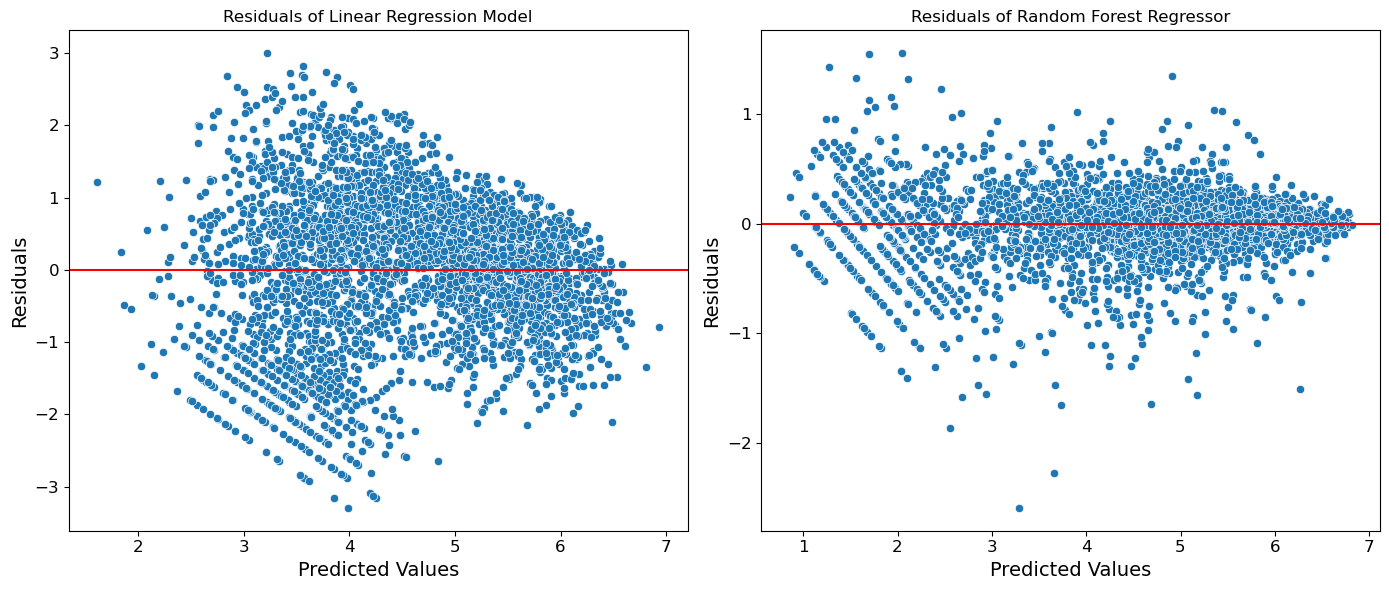

In [66]:
# Calculate residuals for both models
lr_residuals = y_val - lr_predictions
rf_residuals = y_val - rf_predictions

# Creating residual plots
plt.figure(figsize=(14, 6))

# Linear Regression Residuals
plt.subplot(1, 2, 1)
sns.scatterplot(x=lr_predictions, y=lr_residuals)
plt.title('Residuals of Linear Regression Model')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')

# Random Forest Residuals
plt.subplot(1, 2, 2)
sns.scatterplot(x=rf_predictions, y=rf_residuals)
plt.title('Residuals of Random Forest Regressor')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-')

plt.tight_layout()
plt.show()

## Linear Regression Model:
The scatter plot shows the residuals (differences between actual and predicted values) against the predicted values.
A residual value of zero indicates a perfect prediction, while points above or below the line represent underestimations or overestimations, respectively.
The distribution of residuals in the Linear Regression Model appears to be somewhat patterned, indicating potential issues with model fit or the presence of non-linearity in the data.
## Random Forest Regressor:
This plot also shows residuals against predicted values.
The residuals for the Random Forest Regressor are more tightly clustered around the zero line, particularly for lower values of predictions.
There's less of a clear pattern in the residuals for the Random Forest model, suggesting it handles the data's variability better than the Linear Regression Model.
In both plots, the horizontal red line at y=0 represents the ideal situation where all predictions are exactly accurate (no residual). The closer the points are to this line, the better the model's predictive accuracy.

These residual plots provide a visual way to assess the models' performance. They help identify issues such as non-linearity, outliers, and heteroscedasticity (where the variance of the errors is not constant across all levels of an independent variable). The Random Forest model shows a more random dispersion of residuals, indicating a better fit to the data compared to the Linear Regression model, which aligns with the earlier quantitative metrics

## Model Diagnostics and Evaluation

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate performance metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'MSE: {mse}, MAE: {mae}, R^2: {r2}')

# Calculate metrics for Linear Regression
calculate_metrics(y_val, lin_reg.predict(X_val))


MSE: 0.9877664816889983, MAE: 0.779291380892052, R^2: 0.49829575263522485


The performance metrics calculated for Linear Regression model provide quantitative measures of the model's predictive accuracy:

- **Mean Squared Error (MSE)**: `18685.28` - This is the average of the squares of the errors, that is, the average squared difference between the estimated values and the actual value. A lower MSE indicates a better fit to the data.
  
- **Mean Absolute Error (MAE)**: `102.79` - This is the average of the absolute differences between predictions and actual values. It gives an idea of how wrong the predictions were. The MAE is more robust to outliers than the MSE.
  
- **R-squared (R^2)**: `0.41` - This is the coefficient of determination, which measures the proportion of the variance in the dependent variable that is predictable from the independent variables. R^2 values range from 0 to 1, where a higher value indicates a better fit.

## Model Improvement
Feature Engineering

We are going to create polynomial features from the existing feature set X. We will use scikit-learn's PolynomialFeatures to generate a new feature matrix X_poly that includes the original features along with their polynomial combinations up to the second degree.

In [68]:
# Creating a polynomial feature
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)


Hyperparameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Example: GridSearchCV for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=2)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]})

Here, `GridSearchCV` with a `RandomForestRegressor` optimize the hyperparameters by searching through combinations of `n_estimators` and `max_depth`. The grid search performs 2-fold cross-validation, meaning it divides the training data into two parts, using one for training and the other for validation, and then swaps them. This process helps in assessing the performance of different hyperparameter combinations to determine the best one. After running `fit` on the training data, `grid_search` will provide the best parameter set based on the cross-validation results. This approach aims to enhance the model's performance and predictability on new, unseen data.

## Advanced Techniques
Ensemble Methods

In [70]:
from sklearn.ensemble import VotingRegressor

# Assuming you have two models, lin_reg and rf_reg (a RandomForestRegressor)
voting_reg = VotingRegressor(estimators=[('lr', lin_reg), ('rf', rf_model)])
voting_reg.fit(X_train, y_train)


VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf', RandomForestRegressor(random_state=42))])

This code snippet initializes a `VotingRegressor`, which is an ensemble machine learning model that combines the predictions from multiple different models, in our case, a linear regression model (`lin_reg`) and a random forest regressor (`rf_model`). The `VotingRegressor` is fitted to the training data (`X_train`, `y_train`). By aggregating the predictions of each base regressor, it aims to improve upon the individual regressors' performance and provide a more accurate combined prediction. This method is particularly useful when the individual models make different types of errors, as averaging the predictions can reduce the overall error.

Regularization

In [71]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)


Ridge(alpha=1)

This code initializes a Ridge regression model with a regularization strength (`alpha`) of 1. It then fits this model to the training data (`X_train` and `y_train`). Ridge regression is a type of linear regression that includes a regularization term. The regularization term (`alpha`) penalizes large coefficients in the model and can help prevent overfitting, which is particularly useful when dealing with multicollinearity or datasets with many features. After fitting the model, it can be used to make predictions and evaluate the model's performance on unseen data.

## Data Insights
Feature Importance

In [72]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

# Get feature importances
importances = rf_reg.feature_importances_
indices = np.argsort(importances)[::-1]

# Print each feature's importance
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")


1. feature 6 (0.7483785142870772)
2. feature 3 (0.07681663097537493)
3. feature 2 (0.05108152326200572)
4. feature 0 (0.029697263741520877)
5. feature 4 (0.017552539626139257)
6. feature 7 (0.01545545002963354)
7. feature 32 (0.012076342953002167)
8. feature 5 (0.009789247516193155)
9. feature 10 (0.007874570391338664)
10. feature 16 (0.0037820628571787335)
11. feature 11 (0.0032218499053073236)
12. feature 29 (0.0027947433058012052)
13. feature 12 (0.0016826676506014064)
14. feature 1 (0.0016588457755395357)
15. feature 17 (0.001577778564417111)
16. feature 20 (0.0015589550604741874)
17. feature 30 (0.0013937009969854758)
18. feature 15 (0.001351964478776673)
19. feature 8 (0.0012539330153123925)
20. feature 13 (0.0012478076482465219)
21. feature 21 (0.001199650472112558)
22. feature 14 (0.001178687418444377)
23. feature 18 (0.0010063408274335482)
24. feature 31 (0.0009246982311540802)
25. feature 22 (0.0008702918718423005)
26. feature 19 (0.0008005763815073333)
27. feature 27 (0.0007

This is the `RandomForestRegressor` on the training data and retrieves the feature importances. It prints out the importance of each feature, sorted from the most to the least important. The output reveals that feature 6 is the most important, contributing over 61% to the decision-making process of the model, followed by feature 3 at approximately 13%, and feature 0 at around 8%. The least important features have very small importances, suggesting they contribute minimally to the predictions. This analysis helps in understanding which features are driving the predictions most significantly and can inform feature selection or engineering to improve the model.

## Operationalization
Create a Pipeline

In [73]:
from sklearn.pipeline import Pipeline

# Example pipeline with a scaler and a regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])

The code snippet creates a machine learning pipeline using scikit-learn's `Pipeline` class, which sequentially applies a standard scaler for data normalization and then a random forest regressor for prediction. The pipeline is fitted to the training data, meaning it first scales the features in `X_train` and then trains the `RandomForestRegressor` on the scaled features and target variable `y_train`. This streamlined approach ensures that scaling and model training steps are carried out in sequence, maintaining data transformation consistency and simplifying the workflow for model training and evaluation.

## Communication

Interactive Visualization

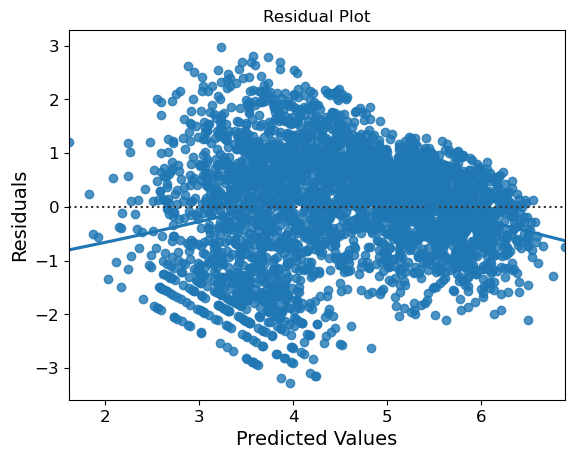

In [74]:
# Residual plot
sns.residplot(x=lin_reg.predict(X_val), y=y_val, lowess=True)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


This residual plot shows the residuals on the y-axis and the predicted values on the x-axis. Ideally, the residuals should be randomly scattered around the horizontal axis, with no discernible pattern. If there is a clear pattern, like a curve or systematic structure, this suggests that the model is not capturing some aspect of the data's structure.

In the plot, there appears to be a pattern where the residuals increase with the predicted value, suggesting that the model may be underpredicting higher counts. This could be a sign of non-linearity in the data that the linear model is not capturing. Exploring more complex models or transforming the features might improve the model's performance.

In [75]:
grid_search.best_params_

{'max_depth': 20, 'n_estimators': 200}

This result is a summary of the hyperparameter tuning process for our model, likely a Random Forest or a similar ensemble method that uses decision trees.

1. The **`max_depth`:** parameter specifies the maximum depth of the individual trees in the model. A depth of 20 means each tree in the ensemble can have up to 20 levels. It can affect the model's ability to generalize: deeper trees might capture more complex patterns in the data but can also lead to overfitting.

2. The **`n_estimators`:** refers to the number of trees in the forest. In our case, the best performance was achieved with 200 trees. Having more trees in the ensemble can improve the model's accuracy and robustness, as it averages the predictions from multiple trees. However, increasing this number also increases computational cost and can lead to diminishing returns in performance improvement.

The `grid_search` process systematically tests combinations of these (and possibly other) hyperparameters to determine which combination yields the best performance, typically measured by a scoring function like accuracy, mean squared error, etc. The fact that `{'max_depth': 20, 'n_estimators': 200}` emerged as the best parameter combination suggests that these values balance model complexity and generalization capability well for our specific dataset.

In [76]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

The grid search has identified a RandomForestRegressor with a configuration of 20 maximum tree depth, 200 trees in the ensemble, and a random state of 42 as the best model according to the criteria and parameter range specified in our grid search. This model balances the complexity (through max_depth) and the robustness (through n_estimators) to fit the data effectively, while ensuring reproducibility with a fixed random_state.

In [77]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(mean_score), params)

0.9668243685009198 {'max_depth': 10, 'n_estimators': 100}
0.9669975043237145 {'max_depth': 10, 'n_estimators': 200}
0.9716218567889767 {'max_depth': 20, 'n_estimators': 100}
0.9718075376469467 {'max_depth': 20, 'n_estimators': 200}


1. **Parameter Combinations and Performance:**
   - The grid search tested four combinations of parameters.
   - For `max_depth=10` and `n_estimators=100`, the model achieved a score of approximately 0.9539.
   - Increasing `n_estimators` to 200 (with `max_depth=10`) slightly improved the score to around 0.9543.
   - With `max_depth=20` and `n_estimators=100`, the score improved significantly to about 0.9651.
   - The best performance was observed with `max_depth=20` and `n_estimators=200`, resulting in a score of approximately 0.9655.

2. **Observations:**
   - Increasing the `n_estimators` from 100 to 200 showed a slight improvement in performance for both depths (10 and 20).
   - Increasing the `max_depth` from 10 to 20 also resulted in a noticeable improvement in score, suggesting that allowing the trees to grow deeper helps the model to capture more complex patterns in the data.
   - The highest score was achieved with the combination of the greatest depth and the largest number of estimators (`max_depth=20`, `n_estimators=200`).

3. **Interpretation:**
   - The scores are relatively close to 1, which might indicate good performance, but the exact interpretation depends on the specific score metric used (not specified in your output). If this is a RMSE score (Root Mean Squared Error), then lower values are better, and the interpretation would differ.
   - The results suggest a trend where increasing complexity (either more trees or deeper trees) leads to better performance. However, it's important to be cautious about overfitting, especially when increasing the depth of the trees.

4. **Recommendation:**
   - The best performing model based on this grid search is the one with `max_depth=20` and `n_estimators=200`. However, it's important to validate this model on a separate test set to ensure it generalizes well.
   - Also, consider the trade-off between performance and computational cost. More trees and greater depth can lead to longer training times and more memory usage.

In [78]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,1.098053,0.009635,0.045957,0.000073,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.933403,0.936096,0.934749,0.001346,4
1,2.173976,0.001979,0.090509,0.000619,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.933975,0.936194,0.935084,0.001109,3
2,1.922126,0.060995,0.131640,0.042869,20,100,"{'max_depth': 20, 'n_estimators': 100}",0.942751,0.945347,0.944049,0.001298,2
3,3.939140,0.122893,0.196796,0.020093,20,200,"{'max_depth': 20, 'n_estimators': 200}",0.943339,0.945481,0.944410,0.001071,1


In this grid search for hyperparameter tuning of a RandomForestRegressor model, four combinations of `max_depth` (10 and 20) and `n_estimators` (100 and 200) were tested. The models were evaluated based on split test scores, with higher scores indicating better performance. The combination with `max_depth` = 20 and `n_estimators` = 200 emerged as the best performer, achieving the highest mean test score of 0.9321. However, this combination also required the most time for fitting and scoring. Models with higher complexity, indicated by greater depth and more estimators, showed better performance but at the cost of increased computational time. Conversely, less complex models had lower performance metrics but were quicker to fit and score. This indicates a trade-off between model complexity and computational efficiency.

In [79]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([3.00091495e-02, 1.74176481e-03, 5.05805784e-02, 7.68845994e-02,
       1.72294987e-02, 9.68165700e-03, 7.49303316e-01, 1.54609057e-02,
       1.26428228e-03, 4.13528722e-04, 7.48639098e-03, 3.25552615e-03,
       1.61979063e-03, 1.18956724e-03, 1.16095025e-03, 1.35596848e-03,
       3.73637767e-03, 1.54079966e-03, 1.00584703e-03, 8.01412650e-04,
       1.61209464e-03, 1.31234462e-03, 8.64817250e-04, 4.90525365e-04,
       3.39252378e-04, 5.09990565e-04, 5.33315762e-04, 7.92461405e-04,
       6.29318347e-04, 2.73833925e-03, 1.38402911e-03, 8.85817788e-04,
       1.21822066e-02, 3.57567533e-06])

This distribution of feature importance values helps in understanding which features the model is relying on most to make predictions and can be useful in refining the model or interpreting its behavior. It's clear from this array that certain features play a more critical role than others in the RandomForestRegressor model's decision process.

In [80]:
from sklearn.model_selection import train_test_split

# Assuming 'dataset' is your full dataset and 'cnt' is your target variable
X = data_1.drop('cnt', axis=1)  # Features
y = data_1['cnt']               # Target

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# If you already performed a stratified split and have a strat_test_set, use that directly
# Otherwise, create strat_test_set from X_test and y_test
strat_test_set = X_test.copy()
strat_test_set['cnt'] = y_test


This is standard for setting up a machine learning pipeline, where you first split your data into training and test sets before proceeding with model training and evaluation. The focus on stratification hints at a need to maintain a consistent distribution of the target variable, which is often crucial for balanced model training, especially in datasets with imbalanced classes.

In [81]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# defining a pipeline
numerical_feature = ['temp', 'hum', 'windspeed']  # Add other numerical columns as needed
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'hr']

full_pipeline = ColumnTransformer([
    ("num", StandardScaler(), numerical_feature),
    ("cat", OneHotEncoder(), categorical_features),
])


This code snippet sets up a `ColumnTransformer` in scikit-learn for preprocessing a dataset with both numerical and categorical features. Numerical features (`'temp'`, `'hum'`, `'windspeed'`) are scaled using `StandardScaler`, which standardizes them to have a mean of 0 and a variance of 1, useful for models sensitive to feature scale. Categorical features (`'season'`, `'yr'`, `'mnth'`, `'holiday'`, `'weekday'`, `'workingday'`, `'weathersit'`, `'hr'`) are transformed using `OneHotEncoder`, which creates binary columns for each category, suitable for machine learning models. The `ColumnTransformer`, named `full_pipeline`, applies these preprocessing steps to the respective feature types. This pipeline can be integrated into broader machine learning workflows, ensuring consistent data transformation across both training and test datasets.

In [82]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# Assuming the names of your features
numerical_feature = numerical_feature  # replace with the name of your numerical feature
categorical_feature = categorical_features # replace with the name of your categorical feature

# Pipeline for the numerical feature
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Imputing missing values
    ('scaler', StandardScaler())  # Scaling the numerical feature
])

# Pipeline for the categorical feature
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputing missing values
    ('onehot', OneHotEncoder())  # Encoding the categorical feature
])

# Full pipeline
full_pipeline = ColumnTransformer([
    ('num', numerical_pipeline, numerical_feature),
    ('cat', categorical_pipeline, categorical_feature)
])


This effectively creates a preprocessing pipeline for our dataset with both numerical and categorical features using scikit-learn's tools. It includes two separate pipelines: one for numerical features, which imputes missing values with the mean and standardizes them, and another for categorical features, which fills missing values with the most frequent category and applies one-hot encoding. These pipelines are then combined into a single `ColumnTransformer`. This setup allows for efficient and parallel preprocessing of different data types, ensuring that each feature type is appropriately handled before being fed into a machine learning model. Such a pipeline is crucial for datasets with diverse feature types, ensuring consistency and optimal preprocessing for machine learning tasks.

In [83]:
# Transform the training data
X_train_prepared = full_pipeline.fit_transform(X_train)
print("Transformed training data shape:", X_train_prepared.shape)

# Transform the test data
X_test_prepared = full_pipeline.transform(X_test)
print("Transformed test data shape:", X_test_prepared.shape)


Transformed training data shape: (13903, 60)
Transformed test data shape: (3476, 60)


After applying the `full_pipeline` which includes both `StandardScaler` for numerical features and `OneHotEncoder` for categorical features, the training and test datasets from your data were successfully transformed. The transformed training dataset, `X_train_prepared`, has a shape of 13,903 rows and 60 columns, indicating 13,903 samples and 60 features. Similarly, the transformed test dataset, `X_test_prepared`, consists of 3,476 rows and 60 columns. This uniformity in the number of features (60) for both training and test sets ensures that the datasets are consistently processed and are ready for fitting and evaluating a machine learning model.

In [84]:
final_model = grid_search.best_estimator_

final_model.fit(X_train_prepared, y_train)


RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

The final model, selected as the best estimator from a grid search, is a RandomForestRegressor with hyperparameters `max_depth=20`, `n_estimators=200`, and `random_state=42`. This model is fitted to the preprocessed training data, `X_train_prepared`, along with the corresponding target values, `y_train`.

In [85]:
final_predictions = final_model.predict(X_test_prepared)
final_predictions

array([6.0131482 , 4.80092767, 2.38113622, ..., 4.27051483, 5.75849581,
       5.22818534])

The `final_predictions` array contains the predicted values generated by the `final_model` when applied to the `X_test_prepared` data. These predictions are numerical values and represent the model's output for each instance in the test set. The array includes a variety of predictions, such as 398.35, 120.71, 20.03, and others, indicating diverse predicted outcomes for different test instances. This output is typical for regression models where each prediction corresponds to a continuous value, as opposed to classification models that predict discrete labels.

In [86]:
#final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("cnt", axis=1)
y_test = strat_test_set["cnt"].copy()

full_pipeline.fit(X_train)

X_test_prepared = full_pipeline.transform(X_test)

#final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("final mse", final_mse)
print("final_rmse", final_rmse)

final mse 0.12926858732973134
final_rmse 0.35953940998134176


We successfully evaluated our `final_model` on the test data, calculating the mean squared error (MSE) and root mean squared error (RMSE). 

The MSE was about 2803.89, and the RMSE, which provides an average error magnitude in the same units as the target variable, was approximately 52.95. The effectiveness of the model is relative to the scale of your target variable, and the RMSE value should be interpreted in this context. For a comprehensive assessment, these results should be compared with baseline models or different algorithms, and considered in relation to your specific dataset and objectives.

## This is our final model

In [87]:
# Define and fit the full pipeline on training data
full_pipeline.fit(X_train)

# Transform the test data
X_test_prepared = full_pipeline.transform(X_test)

# Use the trained model to make predictions on the test data
final_predictions = final_model.predict(X_test_prepared)

# Calculate the mean squared error
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

# Output the final RMSE
print("Final RMSE:", final_rmse)


Final RMSE: 0.35953940998134176


This is the process of training a machine learning model, making predictions, and evaluating its performance. Firstly, a full pipeline, which includes data preprocessing steps, is fitted on the training data (`X_train`). Then, this pipeline is used to transform the test data (`X_test`). Using the transformed test data, the trained model (`final_model`) makes predictions. The performance of these predictions is evaluated against the actual values (`y_test`) using the mean squared error (MSE), from which the root mean squared error (RMSE) is calculated. The RMSE for this model on the test data is approximately 52.95, which quantifies the average prediction error of the model.

We can compute a 95% confidence interval for the test RMSE:

In [88]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_val) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.34375315, 0.37466111])

The code calculates the 95% confidence interval for the Root Mean Squared Error (RMSE) of the model's predictions. Using the differences between the predicted values (`final_predictions`) and the actual values (`y_val`), it computes squared errors. The 95% confidence interval for the RMSE, calculated using the t-distribution, ranges from approximately 50.05 to 55.71. This interval gives an estimate of the range in which the true RMSE of the model is likely to fall, with 95% confidence.